# Описание проекта

Интернет-магазине продаёт по всему миру видеоигры. 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Сейчас декабрь 2016 г., и в рамках проекта нужно спланировать кампанию на 2017-й.

## Импорт библиотек и данных 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,6)

import numpy as np

import seaborn as sns

from scipy import stats as st

data = pd.read_csv('/datasets/games.csv')

## Предобработка данных

In [2]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.isna().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

### Переименование столбцов

In [5]:
data.columns = ['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'] 


In [6]:
data.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


__Описание данных__  
__name__ — название игры  
__platform__ — платформа  
__release_year__ — год выпуска  
__genre__ — жанр игры  
__na_sales__ — продажи в Северной Америке (миллионы проданных копий)  
__eu_sales__ — продажи в Европе (миллионы проданных копий)  
__jp_sales__ — продажи в Японии (миллионы проданных копий)  
__other_sales__ — продажи в других странах (миллионы проданных копий)  
__critic_Score__ — оценка критиков (максимум 100)  
__user_Score__ — оценка пользователей (максимум 10)  
__rating__ — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

### Преобразование типов, устранение пропусков
####  Год выпуска 


In [7]:
data.release_year.describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: release_year, dtype: float64

Определим количество пропусков в столбце release_year:

In [8]:
data.release_year.isna().sum()

269

Всего 269 строк не имеют информации о годе выпуска (__release_year__).  
Имея на руках информацию о платформе выхода игры, можно было бы заменить пропущенные значения медианными годами периода выпуска игр для соответствующей платформы. Например игры для GB (Game Boy) выходили с 1989 по 2001 года.
В данном же случае, исключим эти 269 строк из дальнейшего рассмотрения. 

In [9]:
data = data.dropna(subset=['release_year']) 

Преобразуем тип данных для столбца __release_year__

In [10]:
data.release_year = data.release_year.astype(int)
display(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16446 non-null  object 
 2   release_year  16446 non-null  int64  
 3   genre         16444 non-null  object 
 4   na_sales      16446 non-null  float64
 5   eu_sales      16446 non-null  float64
 6   jp_sales      16446 non-null  float64
 7   other_sales   16446 non-null  float64
 8   critic_score  7983 non-null   float64
 9   user_score    9839 non-null   object 
 10  rating        9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


None

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


####  Продажи
#####  Изменение значений

Изменим данные для четырёх столбцов, отражающие продажы игр в четырёх регионах __na_sales,	eu_sales, jp_sales, other_sales__ из миллионов проданных копий в более удобный - тысячи проданных копий и преобразуем формат.

In [11]:
data[['na_sales', 'eu_sales','jp_sales', 'other_sales']] = data[['na_sales', 'eu_sales','jp_sales', 'other_sales']]*1000
data[['na_sales', 'eu_sales','jp_sales', 'other_sales']] = data[['na_sales', 'eu_sales','jp_sales', 'other_sales']].astype(int)

Взглянем на данные в этих столбцах чуть более внимательно.

In [12]:
data[['na_sales', 'eu_sales','jp_sales', 'other_sales', 'other_sales']].info()

display(data.na_sales.describe())
display(data.eu_sales.describe())
display(data.jp_sales.describe())
display(data.other_sales.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   na_sales     16446 non-null  int64
 1   eu_sales     16446 non-null  int64
 2   jp_sales     16446 non-null  int64
 3   other_sales  16446 non-null  int64
 4   other_sales  16446 non-null  int64
dtypes: int64(5)
memory usage: 770.9 KB


count    16446.000000
mean       264.087742
std        818.414201
min          0.000000
25%          0.000000
50%         80.000000
75%        240.000000
max      41360.000000
Name: na_sales, dtype: float64

count    16446.000000
mean       145.944607
std        506.693607
min          0.000000
25%          0.000000
50%         20.000000
75%        110.000000
max      28960.000000
Name: eu_sales, dtype: float64

count    16446.000000
mean        78.479265
std        311.082191
min          0.000000
25%          0.000000
50%          0.000000
75%         40.000000
max      10220.000000
Name: jp_sales, dtype: float64

count    16446.000000
mean        47.592728
std        187.994488
min          0.000000
25%          0.000000
50%         10.000000
75%         30.000000
max      10570.000000
Name: other_sales, dtype: float64

In [13]:
display(data[data['na_sales'] == data['na_sales'].max()])
display(data[data['eu_sales'] == data['eu_sales'].max()])
display(data[data['jp_sales'] == data['jp_sales'].max()])
display(data[data['other_sales'] == data['other_sales'].max()])

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,76.0,8,E


,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,76.0,8,E


,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270,8890,10220,1000,NaN,NaN,NaN


,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9430,400,410,10570,95.0,9,M


В столбцах __na_sales,	eu_sales, jp_sales, other_sales__ нет пропусков или нелогичных данных. Продолжим работу с другими столбцами.

#####   Добавление нового столбца

Для дальнейшего анализа добавим столбец с общими продажами по всем регионам:

In [14]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data = data[['name','platform','release_year','genre','na_sales','eu_sales','jp_sales','other_sales','total_sales','critic_score','user_score','rating']]

data.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,82540,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29080,3580,6810,770,40240,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15680,12760,3790,3290,35520,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15610,10930,3280,2950,32770,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270,8890,10220,1000,31380,NaN,NaN,NaN


Новый столбец __total_sales__ с суммарным количеством проданных копий видеоигр добавлен в таблицу.

####  Оценка критиков

Оценка по 100-бальной шкале для критиков и по 10-бальной для геймеров означает, что они могут быть взяты с сайта __Metacritic__, использующего именно эту систему оценок. Поверхностное сравнение названий игр и соответствующих оценок, показало, что это действительно так.

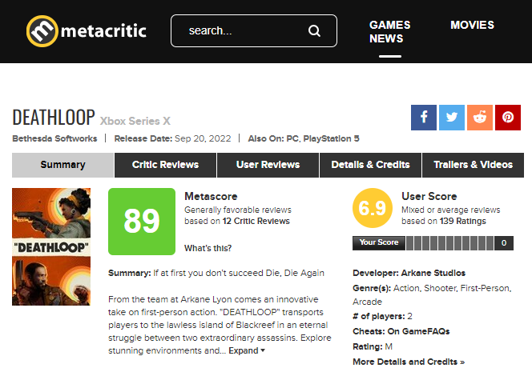

__Metacritic__ — сайт-агрегатор, собирающий отзывы о музыкальных альбомах, играх, фильмах, телевизионных шоу, DVD-дисках и мобильных играх. На основании собранных отзывов сайт высчитывает средний рейтинг продукта, который активно используется в журналистике, индустрии компьютерных игр и бизнесе, в частности, для предсказания коммерческого успеха недавно выпущенной игры. Основан в __2001 году__.

К сожалению, 19 октября 2022 года сайт __Metacritic__ был заблокирован на территории РФ.

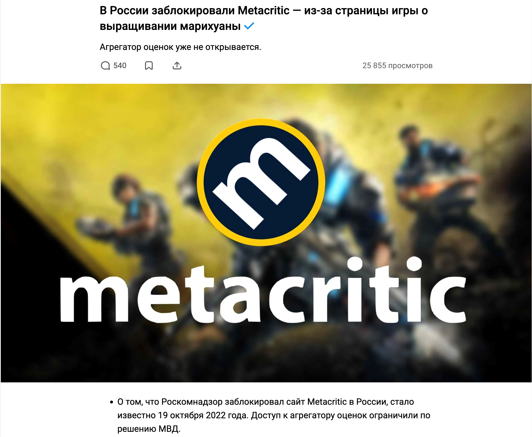

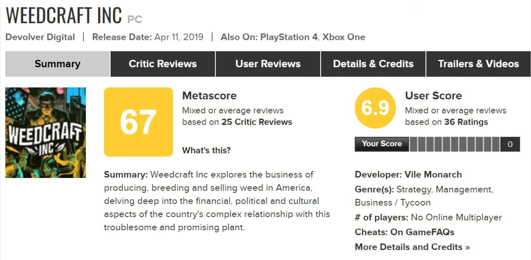

Несмотря на то, что посмотреть отзывы на стратегию по выращиванию марихуаны больше нельзя, мы продолжим выполнение проекта и посмотрим, сколько пропущенных значений есть в стобцах __critic_score__ и __user_score__:

In [15]:
display(data[['critic_score', 'user_score']].isna().sum())

critic_score    8463
user_score      6607
dtype: int64

В столбце __critic_score__ 8463 пропущенных значений. То есть у половины всего датасета нет оценок критиков.  
В столбце с оценками пользователей __user_score__ пропусков чуть меньше - 6607. Разберём почему так произошло, начиная с оценок критиков.  

In [16]:
critic_nan_data = data[data['critic_score'].isna()]
display(critic_nan_data)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29080,3580,6810,770,40240,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270,8890,10220,1000,31380,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23200,2260,4220,580,30260,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26930,630,280,470,28310,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9050,10950,1930,2740,24670,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,10,0,10,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0,10,0,0,10,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,10,0,10,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,10,0,0,0,10,NaN,NaN,NaN


По всей видимости, пропуски в __critic_score__ имеют место во всех категориях и это не систмеатическая ошибка в записи или переносе информации. Узнаем, есть ли зависимость между количеством пропусков и годом выхода игры?

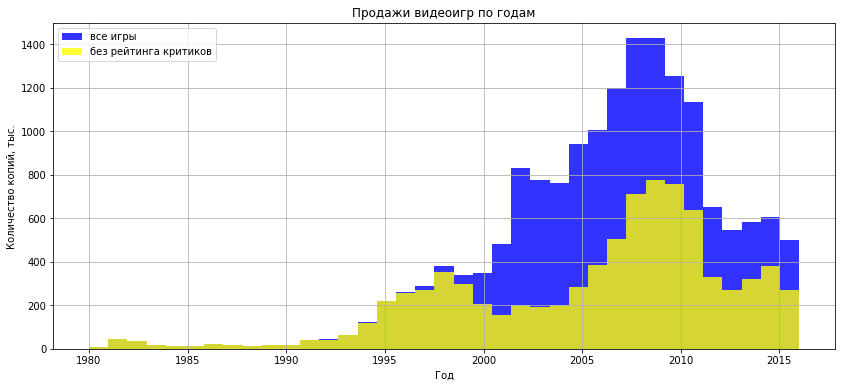

In [17]:
plt.hist(
         data.release_year,  
                            bins =37, 
                            alpha=0.8, 
                            label='все игры',
                            color = 'blue'
        );

plt.hist(
         critic_nan_data.release_year, 
                            bins= 37, 
                            alpha=0.8, 
                            label='без рейтинга критиков',
                            color = 'yellow'
        );

plt.legend(loc='upper left')
plt.title('Продажи видеоигр по годам')
plt.xlabel("Год")
plt.ylabel("Количество копий, тыс.")
plt.grid(True)
plt.show()

По всей видимости, зависимость между количеством игр без рейтинга и годом выпуска есть. До 2000 года разницы между общим количествов игр и игр без рейтинга почти нет. После 2000 года - форма зависимости количества игр без рейтинга критиков повторяет форму зависимости общего количества игр.


Это легко объясняется годом основания __Metacritic__ - 2001 год. После создания на __Metacritic__ начинают пояляться оценки экспертов для игр 2000 года и ранее. Для последующих годов приблизительная одинаковая доля видеоигр, как видно из гистограмм, проходит через геймпады и клавиатуры экспертов, а их мнение публикуется на __Metacritic__.

Заменим пропущенные в столбце __critic_score__ значения на "0", чтобы иметь возможность изменить тип данных в столбце на более удобный _int_. Затем для игр, вышедших ранее 2000 года заменим "0" на "-1", отразив, что рейтинга критиков у таких игр быть не может, тк не был сформирован инструмент для агрегации этих рейтингов.

In [18]:
data.critic_score = data.critic_score.fillna(0)

data.critic_score = data.critic_score.astype(int)

data.loc[((data['critic_score'] == 0) & (data['release_year'] <= 2000)), 'critic_score'] = -1

data.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,82540,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29080,3580,6810,770,40240,-1,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15680,12760,3790,3290,35520,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15610,10930,3280,2950,32770,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270,8890,10220,1000,31380,-1,NaN,NaN


На данном этапе работа с __critic_score__ закончена. Перейдём к __user_score__.

####  Оценка пользователей

In [19]:
data.user_score.describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

In [20]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Стобец __user_score__ состоит не только из численных, но из строковых значений и, помимо пропущенных значений, содержит странную аббревиатуру _tbd_. _tbd_ - аббревиатура для "To Be Determined" или "будет определено".

Аналогично тому, что было сделано с __critic_score__, заменим пропущенные значения в столбце __user_score__ "0" и "-1" для старых игр и подробнее рассмотри строки, в которых содержатся "_tbd_"

In [21]:
data.user_score = data.user_score.fillna(0)
data.loc[((data['user_score'] == 0) & (data['release_year'] < 2001)), 'user_score'] = -1

tbd_data = data.query('user_score == "tbd" ')
display(tbd_data)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3450,2590,0,660,6700,0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2080,1350,0,540,3970,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1510,1030,0,270,2810,0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1650,570,0,200,2420,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1520,540,0,180,2240,0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,10,0,0,0,10,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,10,0,0,0,10,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,10,0,0,0,10,48,tbd,E
16704,Plushees,DS,2008,Simulation,10,0,0,0,10,0,tbd,E


In [22]:
tbd_data.describe()

,release_year,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score
count,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000
mean,2007.450337,125.538721,43.674242,2.781987,15.904882,187.899832,27.005051
std,3.484229,176.592675,112.067694,26.395463,39.410683,291.722882,31.110465
min,1997.000000,0.000000,0.000000,0.000000,0.000000,10.000000,-1.000000
25%,2005.000000,30.000000,0.000000,0.000000,0.000000,50.000000,0.000000
50%,2008.000000,70.000000,10.000000,0.000000,10.000000,110.000000,0.000000
75%,2010.000000,150.000000,40.000000,0.000000,20.000000,220.000000,60.000000
max,2016.000000,3450.000000,2590.000000,860.000000,1090.000000,6700.000000,90.000000


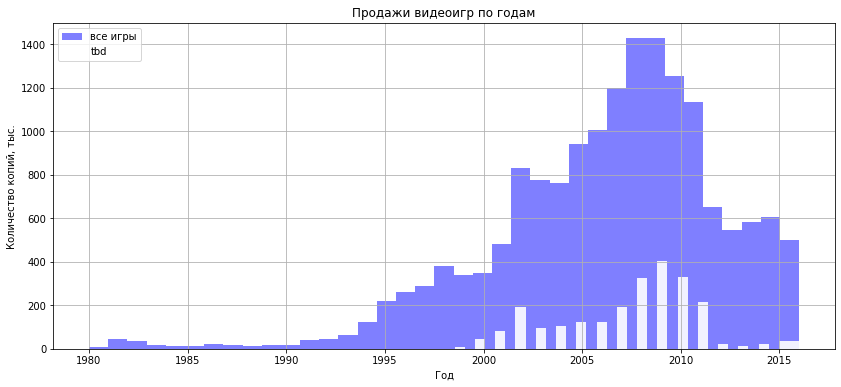

In [23]:
plt.hist(
         data.release_year,  
                            bins =37, 
                            alpha=0.5, 
                            label='все игры',
                            color = 'blue'
        );

plt.hist(
         tbd_data.release_year, 
                            bins= 37, 
                            alpha=0.9, 
                            label='tbd',
                            color = 'white'
        );

plt.legend(loc='upper left')
plt.title('Продажи видеоигр по годам')
plt.xlabel("Год")
plt.ylabel("Количество копий, тыс.")
plt.grid(True)
plt.show()

Из представленных данных видно, что _tbd_ в столбце __user_score__ встречается в разных годах и на разных платформах и, по всей видимости, его отсутствие - не что-то системное. Если найти страницу игры __uDraw Studio__ для платформы Nintendo Wii, то можно увидеть статус _tbd_ в окне оценки пользователей. В данном случае для игры, проданной официально более 2 миллионов раз и вышедшей в 2010 году просто не набралось минимально необходимое число обзоров для публикации рейтинга пользователей.

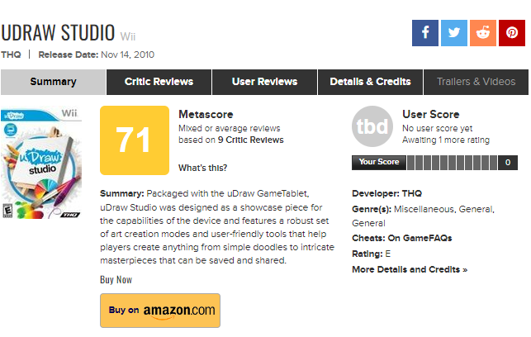

Также заменим значения столбцов __user_score__, содержащие _tbd_, на "0" и "-1" для старых игр. После чего изменим тип данных с _object_ на _float_, а затем, умножив получившиеся значение на 10, изменим тип данных окончательно на _int_.

In [24]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = 0

data.loc[((data['user_score'] == 0) & (data['release_year'] < 2001)), 'user_score'] = -1

data.user_score = pd.to_numeric(data.user_score)
data.user_score = data.user_score*10

data.loc[data['user_score'] == -10, 'user_score'] = -1

data.user_score = data.user_score.astype(int)

data.user_score.describe()

count    16446.000000
mean        32.209109
std         37.004638
min         -1.000000
25%          0.000000
50%          0.000000
75%         73.000000
max         97.000000
Name: user_score, dtype: float64

Теперь столбцы __critic_score__ и __user_score__ содержат данные типа _int_, отражающие оценку видеоигр экспертами и пользователями по одинаковой 100-бальной шкале и не содержат пропусков. При этом __значения "-1" в этих столбцах отражают отсутствие рейтинга из-за формальных причин: слишком старые видеоигры__.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          16444 non-null  object
 1   platform      16446 non-null  object
 2   release_year  16446 non-null  int64 
 3   genre         16444 non-null  object
 4   na_sales      16446 non-null  int64 
 5   eu_sales      16446 non-null  int64 
 6   jp_sales      16446 non-null  int64 
 7   other_sales   16446 non-null  int64 
 8   total_sales   16446 non-null  int64 
 9   critic_score  16446 non-null  int64 
 10  user_score    16446 non-null  int64 
 11  rating        9768 non-null   object
dtypes: int64(8), object(4)
memory usage: 1.6+ MB


####  Возрастной рейтинг

Единственным нерасмотренным остался столбец __rating__, содержащий категорию возрастного рейтинг __ESRB__. Изучим подробнее содержащиеся в нём данные:

In [26]:
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

__Рейтинги Entertainment Software Rating Board (ESRB) (год основания - 1994)__:

«EC» («Early childhood») — «Для детей младшего возраста»

«E» («Everyone») — «Для всех»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«K-A» («for Kids to Adults») - «Для всех» (использовался до 1998, далее переименован в «Everyone»)

«T» («Teen») — «Подросткам»

«M» («Mature») — «Для взрослых»

«AO» («Adults Only 18+») — «Только для взрослых»

«RP» («Rating Pending») — «Рейтинг ожидается»

In [27]:
nan_data = data[data['rating'].isna()]
display(nan_data.head(10))
display(nan_data.tail(10))

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29080,3580,6810,770,40240,-1,-1,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270,8890,10220,1000,31380,-1,-1,NaN
5,Tetris,GB,1989,Puzzle,23200,2260,4220,580,30260,-1,-1,NaN
9,Duck Hunt,NES,1984,Shooter,26930,630,280,470,28310,-1,-1,NaN
10,Nintendogs,DS,2005,Simulation,9050,10950,1930,2740,24670,0,0,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9000,6180,7200,710,23090,-1,-1,NaN
18,Super Mario World,SNES,1990,Platform,12780,3750,3540,550,20620,-1,-1,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6380,4460,6040,1360,18240,0,0,NaN
21,Super Mario Land,GB,1989,Platform,10830,2710,4180,420,18140,-1,-1,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9540,3440,3840,460,17280,-1,-1,NaN


,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
16703,Strawberry Nauts,PSV,2016,Adventure,0,0,10,0,10,0,0,NaN
16705,15 Days,PC,2009,Adventure,0,10,0,0,10,63,58,NaN
16707,Aiyoku no Eustia,PSV,2014,Misc,0,0,10,0,10,0,0,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,10,0,0,0,10,0,0,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0,0,0,0,0,0,0,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,10,0,10,0,0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0,10,0,0,10,0,0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,10,0,10,0,0,NaN
16713,Spirits & Spells,GBA,2003,Platform,10,0,0,0,10,0,0,NaN
16714,Winning Post 8 2016,PSV,2016,Simulation,0,0,10,0,10,0,0,NaN


Из таблиц видно, что без рейтинга __ESRB__ в том числе и игры, разошедшиеся тиражом более десятков миллионов копий. Здесь нужно отметить, что получение рейтинга __ESRB__ - необязательный шаг для того, чтобы выставить на полки магазинов и цифровых маркетплейсов видеоигру. За саму лицензию от __ESRB__ издателю должен заплатить от 3000 долларов, в зависимости от стоимости разработки игры. Также отсутствие рейтинга __ESRB__, не означает отсутсвие рейтинга по другой системе оценок __PEGI__.


Можно сделать вывод, что вероятнее всего, отсутствие рейтинга означает:
* что речь идёт о небольшой игре, от небольшой студии, которая не может позволить себе лишние расходы;
* издатель не планирует продвижение игры на рынке северной америки;
* издатель осознанно решил не получать рейтинг __ESRB__, получив только рейтинг __PEGI__;
* издатель предсказал сниженных продаж от получения рейтинга рейтинг __ESRB__.

Посмотрим, зависят ли пропуски в столбце __rating__ от года издания игры.

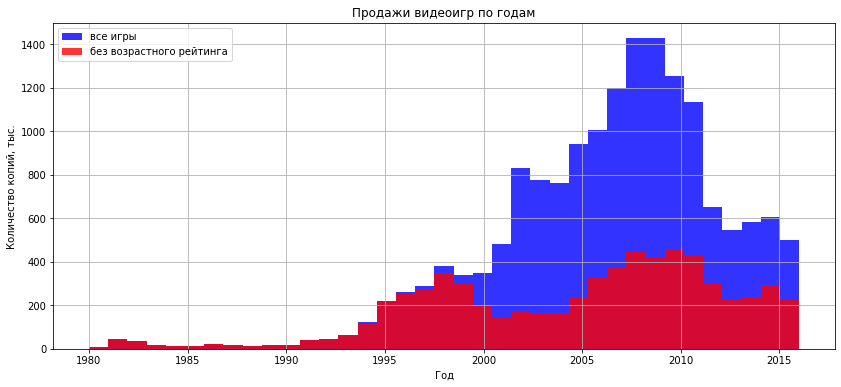

In [28]:
plt.hist(
         data.release_year,  
                            bins =37, 
                            alpha=0.8, 
                            label='все игры',
                            color = 'blue',
        );

plt.hist(
         nan_data.release_year, 
                            bins= 37, 
                            alpha=0.8, 
                            label='без возрастного рейтинга',
                            color = 'red',
        );

plt.legend(loc='upper left')
plt.title('Продажи видеоигр по годам')
plt.xlabel("Год")
plt.ylabel("Количество копий, тыс.")
plt.grid(True)
plt.show()

Из представленного выше видно, что в столбце __rating__ 6678 пропусков, при этом также, как и раньше, форма зависимости повторяет форму зависимости выхода игр по годам. Также видно, что несмотря на то, что __ESRB__ была основана в 1994 году, заметная доля видеоигр, получившая рейтинг от этой организации появляется только в 2000 году и позднее.

Учитывая сказанное выше, заменим все пропуски рейтинга в столбце __rating__ выражением "n/a" для игр вышедших раньше 1994 года (Поскольку __ESRB__ не существовало), для других игр - выражением "no_rating".

In [29]:
data.loc[((data['rating'].isna()) & (data['release_year'] < 1994)), 'rating'] = 'n/a'
data.loc[data['rating'].isna(), 'rating'] = 'no rating'

data.head(10)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,82540,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29080,3580,6810,770,40240,-1,-1,n/a
2,Mario Kart Wii,Wii,2008,Racing,15680,12760,3790,3290,35520,82,83,E
3,Wii Sports Resort,Wii,2009,Sports,15610,10930,3280,2950,32770,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270,8890,10220,1000,31380,-1,-1,no rating
5,Tetris,GB,1989,Puzzle,23200,2260,4220,580,30260,-1,-1,n/a
6,New Super Mario Bros.,DS,2006,Platform,11280,9140,6500,2880,29800,89,85,E
7,Wii Play,Wii,2006,Misc,13960,9180,2930,2840,28910,58,66,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14440,6940,4700,2240,28320,87,84,E
9,Duck Hunt,NES,1984,Shooter,26930,630,280,470,28310,-1,-1,n/a


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          16444 non-null  object
 1   platform      16446 non-null  object
 2   release_year  16446 non-null  int64 
 3   genre         16444 non-null  object
 4   na_sales      16446 non-null  int64 
 5   eu_sales      16446 non-null  int64 
 6   jp_sales      16446 non-null  int64 
 7   other_sales   16446 non-null  int64 
 8   total_sales   16446 non-null  int64 
 9   critic_score  16446 non-null  int64 
 10  user_score    16446 non-null  int64 
 11  rating        16446 non-null  object
dtypes: int64(8), object(4)
memory usage: 1.6+ MB


Замены с толбце __rating__ прошли успешно. Во всем датасете теперь нет пропущенных значений. Можно перейти к исследовательскому анализу.

## Исследовательский анализ данных

### Релиз видеоигр по годам

Расмотрим сколько видеоигр, было сделано в разные года:

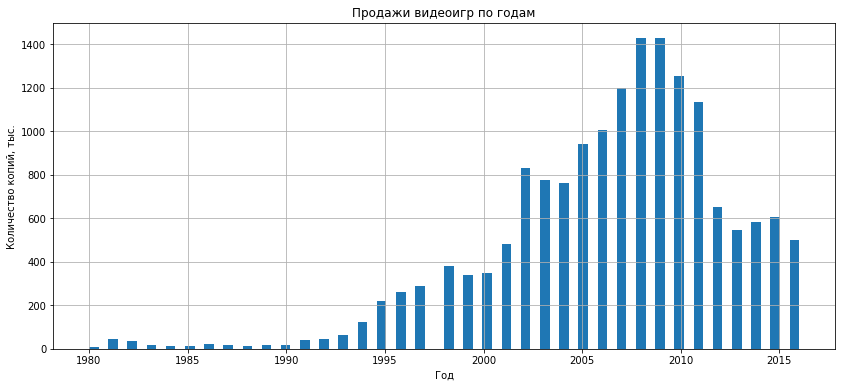

In [31]:
data.release_year.plot(
                        kind= 'hist', 
                        figsize=(14,6), 
                        bins =74, 
                        legend = False,
                        grid = True,
                        fontsize = 10
                       );

plt.title('Продажи видеоигр по годам');
plt.xlabel("Год");
plt.ylabel("Количество копий, тыс.");

Из таблицы и гистограммы можено видеть, что рекордсменом по релизу игр стал 2008-ой год. Период с 2008 по 2011 - очень продуктивный для видоеигровой индустрии, исходя из изучаемых данных. В 2012 же вышло почти в два раза меньше тайтлов, чем в предыдущий 2011. Меньше всего игр вышло в 1980 году. Всего 9, но очень популярных и ознаменовавших собой начало эпохи консольного гейминга.

In [32]:
display(data[data.release_year == 1980])

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
262,Asteroids,2600,1980,Shooter,4000,260,0,50,4310,-1,-1,n/a
546,Missile Command,2600,1980,Shooter,2560,170,0,30,2760,-1,-1,n/a
1764,Kaboom!,2600,1980,Misc,1070,70,0,10,1150,-1,-1,n/a
1968,Defender,2600,1980,Misc,990,50,0,10,1050,-1,-1,n/a
2650,Boxing,2600,1980,Fighting,720,40,0,10,770,-1,-1,n/a
4019,Ice Hockey,2600,1980,Sports,460,30,0,10,500,-1,-1,n/a
5360,Freeway,2600,1980,Action,320,20,0,0,340,-1,-1,n/a
6300,Bridge,2600,1980,Misc,250,20,0,0,270,-1,-1,n/a
6875,Checkers,2600,1980,Misc,220,10,0,0,230,-1,-1,n/a


Приставка __Atari 2600__ стала первой успешной приставкой с играми на картриджах. __Asteroids__ продалась тиражом более 4 миллионов копий!  Однако для того, чтобы выполнить главную цель исследования, построить прогноз продаж на 2017 год, эти данные представляют мало интереса.

### Продажи по платформам

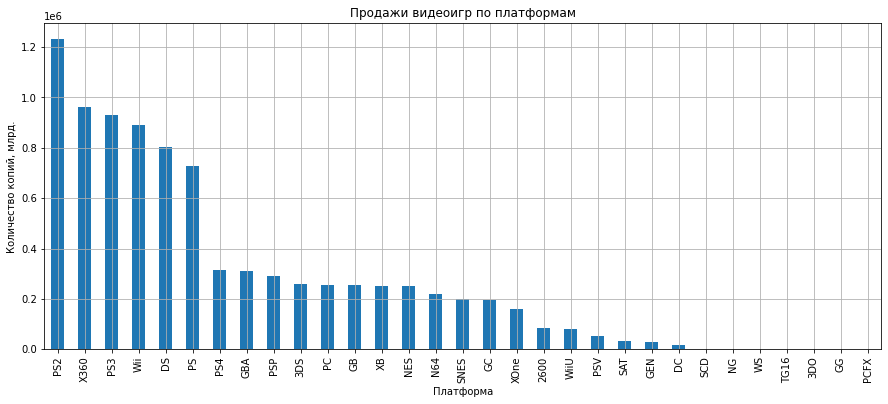

In [33]:
(

data.pivot_table(
                 index = 'platform', 
                 values = 'total_sales', 
                 aggfunc = 'sum'
                )

    .sort_values(
                 by = 'total_sales', 
                 ascending = False
                )
    
    .plot(
          kind = 'bar', 
          figsize=(15, 6),
          legend = False,
          grid = True,
          fontsize = 10
         )
)

plt.title('Продажи видеоигр по платформам');
plt.xlabel("Платформа");
plt.ylabel("Количество копий, млрд.");

Из гистограммы видно, что наибольшие суммарные продажи копий игр в порядке убывания приходится на __Playstation 2__, __Xbox 360__, __Playstation 3__, __Nintendo Wii__, __Nintendo DS__ и  __Playstation__. Для всех вышеуказанных платформ общие продажи видеоигр превзошли 600 миллионов копий. При этом общее количество проданных копий для __Playstation 2__ превышает 1 миллиард.

Рассмотрим продажи для каждой из этих шести платформ в зависимости от года выхода игр. 

In [34]:
ps_data = data[data.platform == 'PS'].pivot_table(
                                                  index = 'release_year', 
                                                  values = 'total_sales', 
                                                  aggfunc = 'sum'
                                                  )

ps2_data = data[data.platform == 'PS2'].pivot_table(
                                                    index = 'release_year', 
                                                    values = 'total_sales', 
                                                    aggfunc = 'sum'
                                                    )

ps3_data = data[data.platform == 'PS3'].pivot_table(
                                                    index = 'release_year', 
                                                    values = 'total_sales', 
                                                    aggfunc = 'sum'
                                                    )

x360_data = data[data.platform == 'X360'].pivot_table(
                                                      index = 'release_year', 
                                                      values = 'total_sales', 
                                                      aggfunc = 'sum'
                                                      )

wii_data = data[data.platform == 'Wii'].pivot_table(
                                                    index = 'release_year', 
                                                    values = 'total_sales', 
                                                    aggfunc = 'sum'
                                                    )

ds_data = data[data.platform == 'DS'].pivot_table(
                                                  index = 'release_year', 
                                                  values = 'total_sales', 
                                                  aggfunc = 'sum'
                                                  )

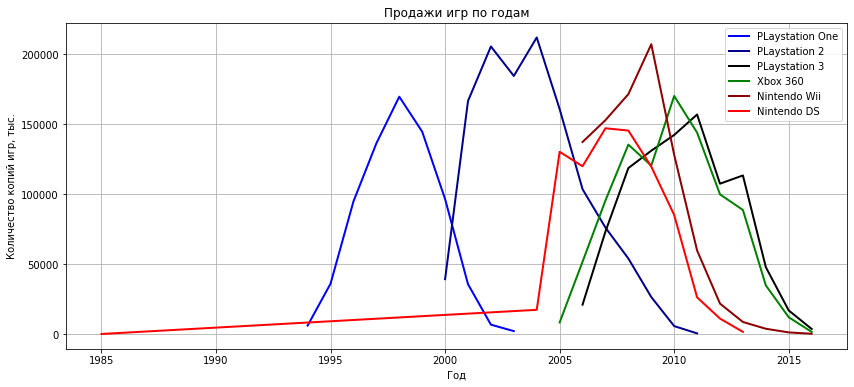

In [35]:
plt.rcParams["figure.figsize"] = (14,6)

plt.plot(ps_data,   color='blue',      linewidth=2,   label='PLaystation One');
plt.plot(ps2_data,  color='darkblue',  linewidth=2,   label='PLaystation 2');
plt.plot(ps3_data,  color='black',     linewidth=2,   label='PLaystation 3');
plt.plot(x360_data, color='green',     linewidth=2,   label='Xbox 360');
plt.plot(wii_data,  color='darkred',   linewidth=2,   label='Nintendo Wii');
plt.plot(ds_data,   color='red',       linewidth=2,   label='Nintendo DS');


plt.title('Продажи игр по годам')
plt.legend()
plt.xlabel("Год")
plt.ylabel("Количество копий игр, тыс.")
plt.grid(True)

Из общей диаграммы видно, что:  

* __Жизненный цикл__ платформы - приблизительно __10 лет__.  

* У всех шести консолей есть экстремум 1 или 2 где-то в __середине их "жизненно цикла"__, отражающий максимум продаж за всё время.  

* Для данных __Nintendo DS__ есть выброс в 1985 год, когда консоли ещё не существовало.  

Устраним выброс и взглянем на графики продаж игр для 6 самых популярных за всё время платфори ещё раз.

In [36]:
data.query('(release_year == 1985) and (platform == "DS")')

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0,0,20,0,20,-1,-1,n/a


Судя по открытым источникам, игра __Strongest Tokyo University Shogi DS__ на самом деле вышла в 2010 году. Устраним ошибку.

In [37]:
data.loc[(data['release_year'] == 1985) & (data['platform'] == 'DS'),'release_year'] = 2010
data.query('name == "Strongest Tokyo University Shogi DS" ')

ds_data = data[data.platform == 'DS'].pivot_table(
                                                  index = 'release_year', 
                                                  values = 'total_sales', 
                                                  aggfunc = 'sum'
                                                  )

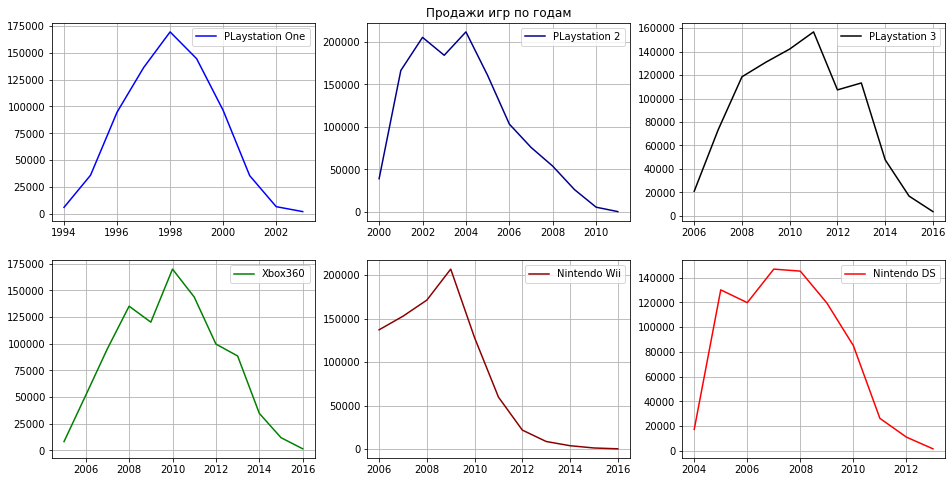

In [38]:
plt.figure(figsize=(16,8))

plt.subplot(2,3,1) 
plt.plot(ps_data, color='blue', label='PLaystation One')
plt.grid(True)
plt.legend()

plt.subplot(2,3,2) 
plt.plot(ps2_data, color='darkblue', label='PLaystation 2')
plt.grid(True)
plt.legend()
plt.title('Продажи игр по годам')

plt.subplot(2,3,3) 
plt.plot(ps3_data, color='black', label='PLaystation 3')
plt.grid(True)
plt.legend()

plt.subplot(2,3,4) 
plt.plot(x360_data, color='green', label='Xbox360')
plt.grid(True)
plt.legend()

plt.subplot(2,3,5) 
plt.plot(wii_data, color='darkred', label='Nintendo Wii')
plt.grid(True)
plt.legend()

plt.subplot(2,3,6) 
plt.plot(ds_data, color='red', label='Nintendo DS')
plt.grid(True)
plt.legend()

plt.show()

Имея в виду, что:

__Playstation One__ выпущена - снята с производства: 3 декабря 1994 - 4 марта 2000  
__Playstation 2__ выпущена - снята с производства: 3 марта 2000 - 11 ноября 2006  
__Playstation 3__ выпущена - снята с производства: 11 ноября 2006 - 15 ноября 2013  
__Xbox 360__ выпущена - снята с производства: 22 ноября 2005 - 22 ноября 2013  
__Nintendo Wii__  выпущена - снята с производства: 9 ноября 2006 - 20 октября 2013   
__Nintendo DS__  выпущена - снята с производства: 21 ноября 2004 - 31 августа 2013  

отметим, что продажи игр для каждой платформа продолжаются ещё 1-3 года после завершения выпуска самих платформ.
Таким образом, можно сказать, что жизненный цикл для платформы - __10 лет__, при этом пик продаж видеоигр приходится на 4-5 год после запуска платформы.

Также нужно отметить, что ни одна из рассмотренных ранее 6 самых популярных платформ не может быть рассмотрена для прогноза продаж игр на 2017 год. В 2016 году, как можно видеть из диаграмм, продажи были зафиксированы только для __PLaystation 3__, __Xbox360__ и __Nintendo Wii__ и только на низких, по-сравнению с общими для платформы, уровне.

Рассмотрим ещё раз продажи по всем платформам по всему миру за все года, прежде, чем двигаться дальше.

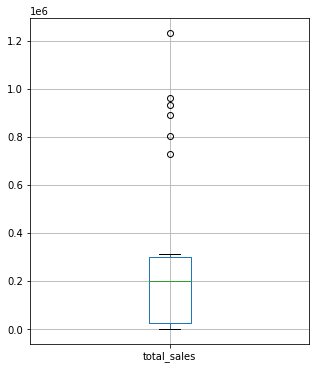

In [39]:
data.pivot_table(
                 index = 'platform', 
                 values = 'total_sales', 
                 aggfunc = 'sum'
                ).boxplot(figsize =(5, 6));

In [40]:
data.pivot_table(
                 index = 'platform', 
                 values = 'total_sales', 
                 aggfunc = 'sum'
                ).describe()

,total_sales
count,3.100000e+01
mean,2.844120e+05
std,3.438936e+05
min,3.000000e+01
25%,2.336000e+04
50%,2.000400e+05
75%,3.012050e+05
max,1.233557e+06


По диаграмме размаха видно, что для большинства платформ, консолей или приставок типичными за весь жизненный цикл являются продажа от __23__ до __300__ миллионов копий видеоигр. Только 6 точек лежат вне "усов ящика", и это продажи для уже упомянутых приставок:

In [41]:
(
data.pivot_table(
                 index = 'platform', 
                 values = 'total_sales', 
                 aggfunc = 'sum'
                 )
    
    .sort_values(by = 'total_sales', 
                 ascending = False)
    
    .head(6)
)

,total_sales
platform,
PS2,1233557
X360,961239
PS3,931336
Wii,891178
DS,802780
PS,727577


### Актуальный период

Таким образом, чтобы построить прогноз продаж на 2017 год, нужно взять данные из датасета, которые бы отражали актуальное состояние рынка видеоигр. Как было сказано ранее, жизненный цикл платформы (консоли или приставки) - __10 лет__. Максимальные продажи достигаются спустя __5 лет__ с начала продаж. Для того, чтобы не задеть длинный хвост продаж приставок __Playstation 3__ и __Xbox 360__, поддержка которых закончилась в 2013, возьмём за __актуальные данные__ за последние 3 года продаж, начиная с __2014__.

In [42]:
act_data = data.query('release_year >= 2014')
act_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          1689 non-null   object
 1   platform      1689 non-null   object
 2   release_year  1689 non-null   int64 
 3   genre         1689 non-null   object
 4   na_sales      1689 non-null   int64 
 5   eu_sales      1689 non-null   int64 
 6   jp_sales      1689 non-null   int64 
 7   other_sales   1689 non-null   int64 
 8   total_sales   1689 non-null   int64 
 9   critic_score  1689 non-null   int64 
 10  user_score    1689 non-null   int64 
 11  rating        1689 non-null   object
dtypes: int64(8), object(4)
memory usage: 171.5+ KB


Из более 16 тысяч строк в датасете осталось 4 тысячи, которые помогут сделать в дальнейшем прогноз на 2017-ый год.

### Потенциально прибыльные платформы

Рассмотрим актуальный датасет, сформированный на предыдущем шаге, на предмет общих продаж по платформам. 

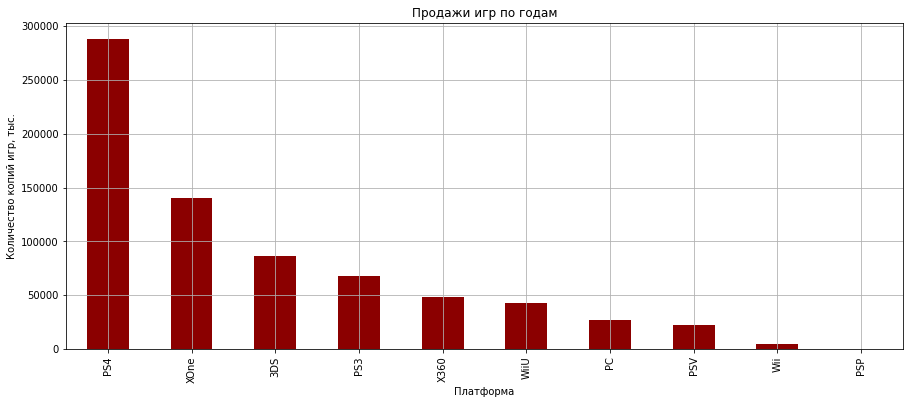

In [43]:
(
act_data.pivot_table(
                     index = 'platform', 
                     values = 'total_sales', 
                     aggfunc = 'sum'
                     )
        
        .sort_values(by = 'total_sales', 
                     ascending = False)
        
        .plot(kind = 'bar', 
              figsize=(15, 6),
              legend = False,
              grid = True,
              color = 'darkred',
              fontsize = 10)
);

plt.title('Продажи игр по годам')

plt.xlabel("Платформа")
plt.ylabel("Количество копий игр, тыс.");

Действительно, за период с 2014 по 2016 лидерами продаж видеоигр по платформам являются уже совсем другие приставки:

In [44]:
(
act_data.pivot_table(
                     index = 'platform', 
                     values = 'total_sales', 
                     aggfunc = 'sum')
    
        .sort_values(by = 'total_sales', 
                     ascending = False)
        .head(3)
)

,total_sales
platform,
PS4,288150
XOne,140360
3DS,86680


Более 250 миллионов проданных копий игр для __Playstation 4__, 140 миллионов для __Xbox One__ и 80 миллионов для __Nintendo 3DS__ делают вышеуказанные консоли самыми перспективными для формирования на их основе стратегии продаж и рекламы на 2017-ый год. 

Рассмотрим подробнее статистику по продаже для этих платформ по годам за всё время.

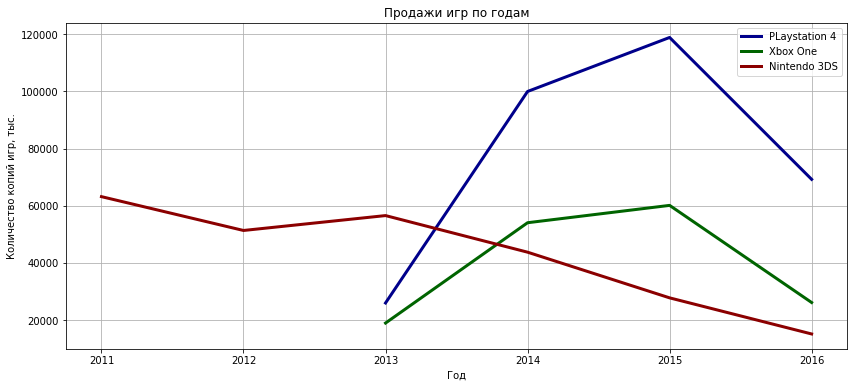

In [45]:
ps4_data = data[data.platform == 'PS4'].pivot_table(
                                                    index = 'release_year', 
                                                    values = 'total_sales', 
                                                    aggfunc = 'sum'
                                                    )

xone_data = data[data.platform == 'XOne'].pivot_table(
                                                      index = 'release_year', 
                                                      values = 'total_sales', 
                                                      aggfunc = 'sum'
                                                      )

tds_data = data[data.platform == '3DS'].pivot_table(
                                                    index = 'release_year', 
                                                    values = 'total_sales', 
                                                    aggfunc = 'sum'
                                                    )

plt.rcParams["figure.figsize"] = (14,6)

plt.plot(ps4_data,  color='darkblue',  linewidth=3,  label='PLaystation 4');
plt.plot(xone_data, color='darkgreen', linewidth=3,  label='Xbox One');
plt.plot(tds_data,  color='darkred',   linewidth=3,  label='Nintendo 3DS');

plt.title('Продажи игр по годам')
plt.legend()
plt.grid(True)
plt.xlabel("Год")
plt.ylabel("Количество копий игр, тыс.");

Несмотря на то, что

__Playstation 4__ выпущена: 15 ноября 2013

__Xbox One__ выпущена: 22 ноября 2013

__Nintendo 3DS__ выпущена: 26 февраля 2011 

и только для __Nintendo 3DS__ прошло больше 5 лет от даты запуска до временных промежутков, рассматриваемых в рамках датасета, по графику выше видно, что возможно:

* пик продаж для всех трёх консолей уже пройден;
* в датасете неполные данные по продажам за 2016 год.

Тем не менее, это не делает сделанные выводы неверными, а лишь подтверждает то, что общие продажи видеоигр по всему миру падают с 2009 года.

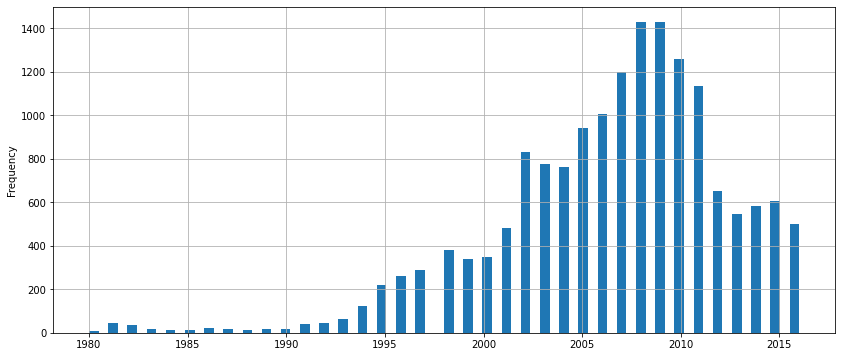

In [46]:
data.release_year.plot(
                       kind= 'hist', 
                       figsize=(14,6), 
                       bins =74, 
                       legend = False,
                       grid = True,
                       fontsize = 10
                       );

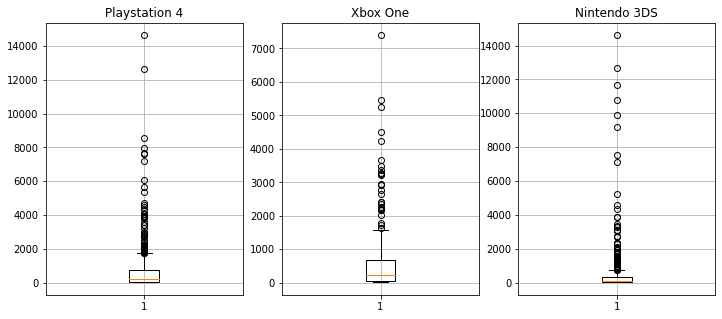

In [47]:
ps4_data = data[data.platform == 'PS4']
xone_data = data[data.platform == 'XOne']
tds_data = data[data.platform == '3DS']

plt.figure(figsize=(12,5))

plt.subplot(1,3,1) 
plt.boxplot(ps4_data.total_sales)
plt.grid(True)
plt.title('Playstation 4')

plt.subplot(1,3,2) 
plt.boxplot(xone_data.total_sales)
plt.grid(True)
plt.title('Xbox One')

plt.subplot(1,3,3) 
plt.boxplot(tds_data.total_sales)
plt.grid(True)
plt.title('Nintendo 3DS')

plt.show()

Из диаграмм размаха для трех самых потенциально прибыльных платформ можно сделать вывод, что для __PLaystation 4__ и __Nintendo 3DS__ очень успешные проекты выходили чаще, чем для __Xbox One__. Плотность точек данных в Q4 (верхней части диаграммы) выше именно у __PLaystation 4__ и __Nintendo 3DS__. Такие тайтлы приносили создателем большие прибыли, а платформе - популярность.  Несмотря на это, по общим продажам __Xbox One__ на 2016 год обходит по общим продажам __Nintendo 3DS__.

### Зависимость продаж от отзывов

Для того, чтобы изучить зависимость продаж (__total_sales__) от отзывов критиков (__critic_score__) и геймеров (__user_score__) возьмём актуальные данные и рассмотри три самые перспективные платформы.

#### Xbox 360

In [48]:
x360_score_data = data[data['platform'] == 'X360']
x360_score_data = x360_score_data[['name', 'critic_score', 'user_score', 'total_sales']]

#x360_score_data = x360_score_data.query('critic_score > 0 and user_score > 0')

display(x360_score_data)

,name,critic_score,user_score,total_sales
14,Kinect Adventures!,61,63,21820
23,Grand Theft Auto V,97,81,16270
29,Call of Duty: Modern Warfare 3,88,34,14730
32,Call of Duty: Black Ops,87,63,14620
35,Call of Duty: Black Ops II,83,48,13680
...,...,...,...,...
16613,Dragon Ball Z for Kinect,49,21,10
16622,World Snooker Championship 2007,0,0,10
16647,Metal Gear Solid HD Edition,0,0,10
16654,Ben 10 Omniverse 2,0,51,10


Для этой таблицы построим диаграммы рассеяния и таблицу коэффициентов корреляции.

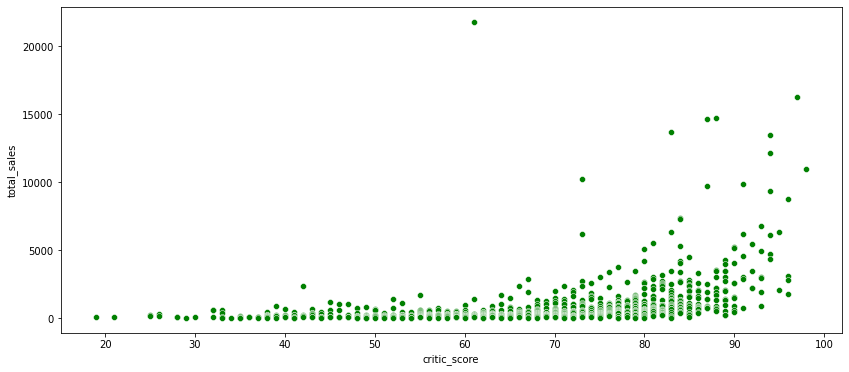

In [49]:
sns.scatterplot(x=x360_score_data.query('critic_score > 0')['critic_score'], 
                y=x360_score_data.query('critic_score > 0')['total_sales'], 
                color = 'green');

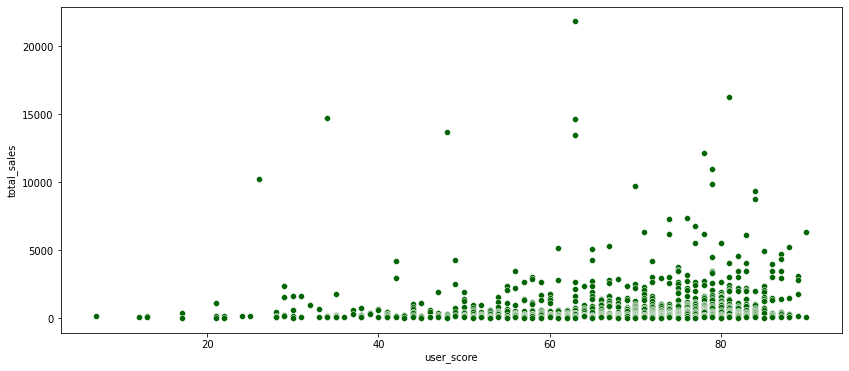

In [50]:
sns.scatterplot(x=x360_score_data.query('user_score > 0')['user_score'], 
                y=x360_score_data.query('user_score > 0')['total_sales'],  
                color = 'darkgreen');

In [51]:
display(x360_score_data.corr()) 

,critic_score,user_score,total_sales
critic_score,1.000000,0.790158,0.311756
user_score,0.790158,1.000000,0.207805
total_sales,0.311756,0.207805,1.000000


Из диаграмм рассеяния и таблицы видно, что общие продажи слабо зависят от оценки пользователей, и чуть больше зависят от оценок критиков. При этом легко заметить несколько точек, выбивающихся из общего облака, которые соответствуют хорошо продавшимся, несмотря на плохие оценки, видеоиграм.

Также заметно, что в случае зависимость общих продаж от оценок критиков __critic_score__ намного больше напоминает логичную экспоненциальную зависимость, чем та же диаграмма для __user_score__, особенно в области высоких оценок. Коэффициент коррелиции между __total_sales__ и __critic_score__ в три раза больше, чем для __user_score__.

Из вышесказанного напрашивается вывод: при выборе видеоигры для покупки пользователи __Xbox 360__ обращали больше внимание на __мнение экспертов__, нежели других геймеров. 

Здесь стоит сделать маленькое отступление и чуть более подробно рассмотреть хотя бы один пример выброса на диаграмме рассеяния. Есть ли в датасете видеоигры, для которых __critic_score__ и __user_score__ отличаются разительно?

In [52]:
data.query('critic_score > 0 and user_score > 0 and (critic_score - user_score > 50)')

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9040,4240,130,1320,14730,88,34,M
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5540,5730,490,1570,13330,88,32,M
1040,Call of Duty: Modern Warfare 3,PC,2011,Shooter,410,980,0,320,1710,78,25,M
2500,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,550,200,0,80,830,70,18,M
4621,Thrillville: Off the Rails,PS2,2007,Strategy,200,160,0,50,410,70,17,E10+
5379,Company of Heroes 2,PC,2013,Strategy,60,250,0,40,350,80,21,M
10482,Thrillville: Off the Rails,PSP,2007,Strategy,90,0,0,10,100,72,6,E10+
16202,Football Manager Live,PC,2009,Sports,0,10,0,0,10,82,31,no rating


In [53]:
data.query('critic_score > 0 and user_score > 0 and (user_score - critic_score > 50)')

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
5825,Shrek Swamp Kart Speedway,GBA,2002,Racing,220,80,0,10,310,27,89,E
15989,Antz Extreme Racing,XB,2002,Racing,10,0,0,0,10,35,87,E


In [54]:
data.query('name == "Call of Duty: Modern Warfare 3" ').total_sales.sum()

30600

Да, такие видеоигры есть. При этом из 10 самых ярких приведённых выше выбросов 8 - это ситуации, в которых высокие оценки критиков сопровождались разгромными от пользователей уже после выхода игры. Абсолютный рекордсмен в этом - видеоигра __Call of Duty: Modern Warfare 3__, вышедшая в 2011 году и продавшаяся общим тиражом более 30 миллионов копий. Именно эту видеоигру можно видеть на диаграмме рассеяния для __user score__ в виде выброса на значении оценки 34.

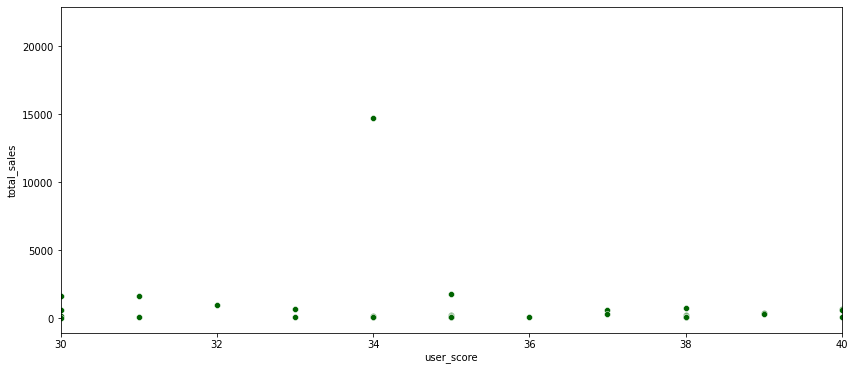

In [55]:
sns.scatterplot(x=x360_score_data['user_score'], 
                y=x360_score_data['total_sales'], 
                color = 'darkgreen');

plt.xlim([30, 40]);

В приведенном выше нет ничего удивительного, если учесть, что оценки критиков на __Metacritic__ формируются до официального релиза игры по пресс-копиям, которые получают те самые критики. Хорошие оценки критиков могут быть ответственны за продажи на релизе - в первые недели. Хорошие оценки пользователей наоборот - ответственны за длинный хвост продаж отдельной видеоигры.

Рассмотрим также диаграммы рассеяния для других популярных и перспективных платформ. Это несколько сравнительно больших разделов, поэтому для экономии времени можно сразу перейти к разделу __3.5.8 Промежуточный вывод__, в котором отражены основные выводы и особенности зависимости общих продаж от оценок

### Перспективные платформы

Далее рассмотри только три платформы, которые мы выбрали как потенциально прибыльные и построим для них диаграммы рассеяния и рассчитаем коэффициенты корреляции.

In [56]:
def scat_cor(df):
    
    critic_score = df.query('critic_score > 0')['critic_score']
    user_score = df.query('user_score > 0')['user_score']
    total_sales = df['total_sales']
    
    sns.scatterplot(
    x=critic_score, 
    y=total_sales,
    color = 'green',
    label = 'Оценка критиков');
    
    sns.scatterplot(
    x=user_score, 
    y=total_sales,
    color = 'darkblue',
    label = 'Оценка пользователей');
    
    display(df.corr()) 

#### Xbox One

,critic_score,user_score,total_sales
critic_score,1.000000,0.793371,0.272518
user_score,0.793371,1.000000,0.102074
total_sales,0.272518,0.102074,1.000000


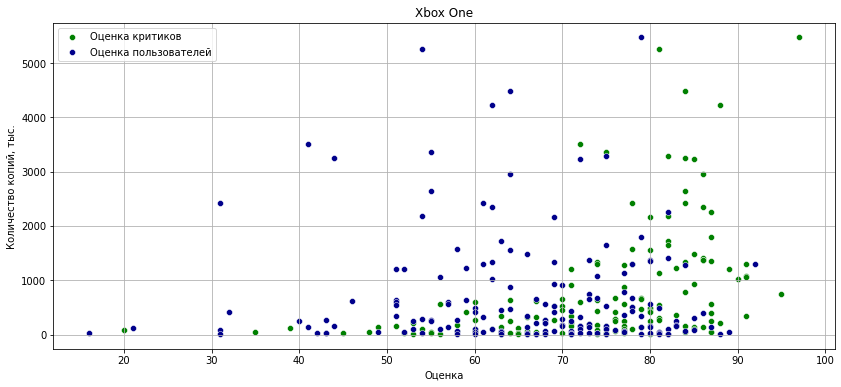

In [57]:
xone_score_data = act_data[act_data['platform'] == 'XOne']
xone_score_data = xone_score_data[['name', 'critic_score', 'user_score', 'total_sales']]

scat_cor(xone_score_data)

plt.title('Xbox One')
plt.xlabel("Оценка")
plt.ylabel("Количество копий, тыс.")
plt.legend()
plt.grid(True)

#### Playstation 4

,critic_score,user_score,total_sales
critic_score,1.000000,0.903670,0.211837
user_score,0.903670,1.000000,0.101448
total_sales,0.211837,0.101448,1.000000


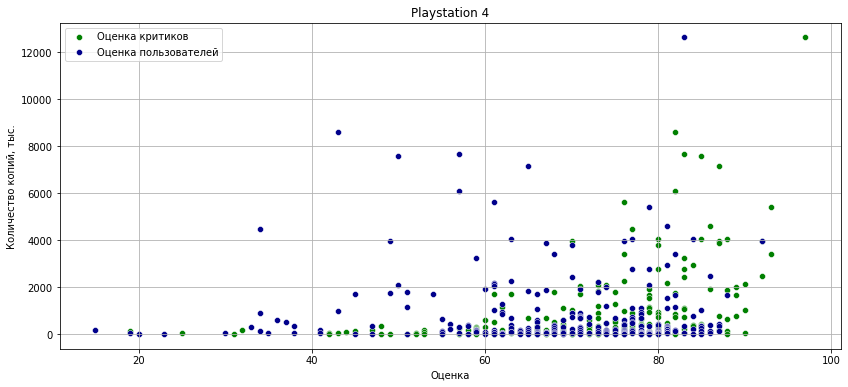

In [58]:
ps4_score_data = act_data[act_data['platform'] == 'PS4']
ps4_score_data = ps4_score_data[['name', 'critic_score', 'user_score', 'total_sales']]

scat_cor(ps4_score_data)

plt.title('Playstation 4')
plt.legend()
plt.xlabel("Оценка")
plt.ylabel("Количество копий, тыс.")
plt.grid(True)

#### Nintendo 3DS

,critic_score,user_score,total_sales
critic_score,1.000000,0.887491,0.053255
user_score,0.887491,1.000000,0.054922
total_sales,0.053255,0.054922,1.000000


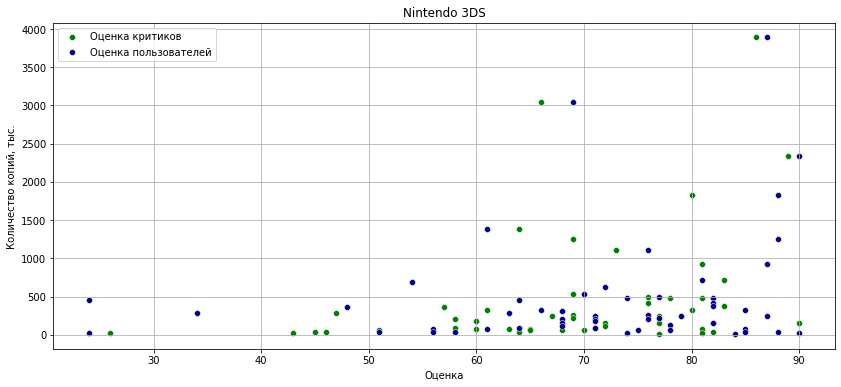

In [59]:
tds_score_data = act_data[act_data['platform'] == '3DS']
tds_score_data = tds_score_data[['name', 'critic_score', 'user_score', 'total_sales']]

scat_cor(tds_score_data)

plt.title('Nintendo 3DS')
plt.legend()
plt.xlabel("Оценка")
plt.ylabel("Количество копий, тыс.")
plt.grid(True)

#### Промежуточный вывод
После сравнения диаграмм и коэффициентов корреляции и для других консолей, можно сделать следующие выводы:
* __Общие продажи__ видеоигр намного больше __зависят от оценки критиков__, а не пользователй. Возможно потому, что бОльшая часть продаж обычно приходится на релиз, когда оценок пользователей ещё нет;
* Для __3 самых перспективных__ платформ __Xbox One__, __PLaystation 4__ и __Nintendo 3DS__ обнаружена сравнительная __высокая зависимость между оценками критиков и общими продажами__. Таким образом, можно сделать вывод о том, что __совремнные геймеры уделяют__ бОльшее, чем раньше __внимание оценкам экспертов__ перед покупкой видеоигры.
* При этом для платформ __Xbox One__ и __PLaystation 4__ обнаружена __отрицательная зависимость между продажами и оценками пользователей__, что может отражать большое количество ситуаций, когда геймер, купивший видеоигру, руководствуясь высокми оценками критиками, не оценивает её также высоко.

### Распределение игр по жанрам

Рассмотрим, можно ли выделить самые прибыльные жанры в видеоиграх и игры с самыми низкими продажами?

,total_sales
genre,
Action,1716517
Sports,1309667
Shooter,1041358
Role-Playing,931080
Platform,825550
Misc,790288
Racing,723487
Fighting,442657
Simulation,387958


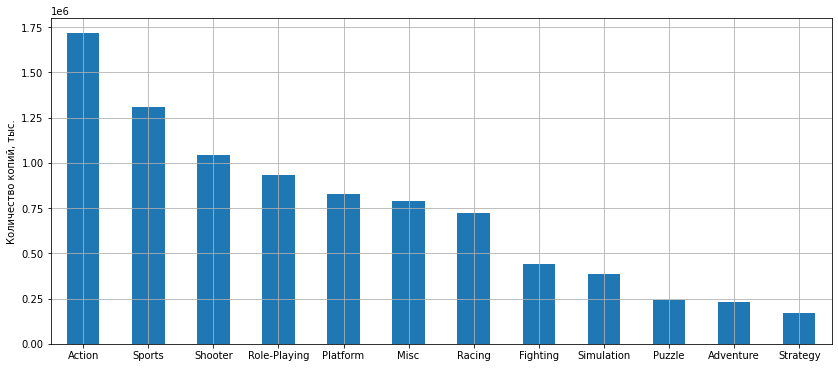

In [60]:
genre_rating = (
                data.pivot_table(
                                index = 'genre', 
                                values = 'total_sales', 
                                aggfunc = 'sum'
                                )

                    .sort_values(
                                 by = 'total_sales', 
                                 ascending = False
                                )
               )

display (genre_rating)

genre_rating.plot(
                  kind= 'bar', 
                  figsize=(14,6), 
                  legend = False,
                  grid = True,
                  rot = 0,
                  fontsize = 10
                 );

plt.xlabel('')
plt.ylabel("Количество копий, тыс.");

Да, действительно, не все жанры одинаковы популярны. Видеоигры только трёх жанров разошлись тиражом более 1 миллиаров копий: __Action__, __Sports__ и __Shooter__. Наименее популярные жанры - __Puzzle__, __Adventure__ и __Strategy__ не достигли в суммарных продажах 250 миллионов копий.

In [61]:
data.query('genre == "Action"').sort_values(by = 'total_sales', ascending = False).head(3)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7020,9090,980,3960,21050,97,82,M
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9430,400,410,10570,20810,95,90,M
23,Grand Theft Auto V,X360,2013,Action,9660,5140,60,1410,16270,97,81,M


In [62]:
display(data.query('name == "Grand Theft Auto V" ').total_sales.sum())

56580

In [63]:
data.query('genre == "Sports"').sort_values(by = 'total_sales', ascending = False).head(3)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41360,28960,3770,8450,82540,76,80,E
3,Wii Sports Resort,Wii,2009,Sports,15610,10930,3280,2950,32770,80,80,E
13,Wii Fit,Wii,2007,Sports,8920,8029,3600,2150,22699,80,77,E


In [64]:
data.query('genre == "Shooter"').sort_values(by = 'total_sales', ascending = False).head(3)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
9,Duck Hunt,NES,1984,Shooter,26930,630,280,470,28310,-1,-1,n/a
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9040,4240,130,1320,14730,88,34,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6030,5860,360,2380,14630,0,0,no rating


In [65]:
data.query('genre == "Strategy"').sort_values(by = 'total_sales', ascending = False).head(3)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
168,Pokemon Stadium,N64,1999,Strategy,3180,1240,940,90,5450,-1,-1,no rating
206,Warzone 2100,PS,1999,Strategy,2790,1890,0,330,5010,-1,-1,no rating
218,StarCraft II: Wings of Liberty,PC,2010,Strategy,2570,1680,0,580,4830,93,82,T


Да, действительно, не все жанры одинаковы популярны. Видеоигры только трёх жанров разошлись тиражом более 1 миллиаров копий: Action, Sports и Shooter. Наименее популярные жанры - Puzzle, Adventure и Strategy не достигли в суммарных продажах 250 миллионов копий.

Если чуть более подробно рассмотреть самые популярные и непопулярные жанры, можно сказать:
* GTA 5 выпущенная к 2016 году на 5 платформах продалась тиражом более 56 миллионов копий, что составляет 20-ую часть от продаж в самом популярном видеоигровом жанре __Action__;
* За высокие продажи в жанре __Sports__ ответственна японская компания __Nintendo__ и покупавшие соответствующие игры жители северной америки;
* Одной из самых популярных игр в самом непопулярном жанре __Strategy__ является __StarCraft2__, которая до сих пор остаётся одной из самых популярных игр в киберспорте;
* Самый популярный шутер (по продажам на одной платформе) всех времён - __Duck Hunt__, выпущенный в 1984 году __Nintendo__ на платформе __NES__. Возможно, вы знакомы, с этой игрой и аппаратным клоном этой платформы в странах СНГ - __Dendy__. Общий тираж игры - более 28 миллионов копий, без учёта не совсем легальных, которые были выпущены на __Dendy__.

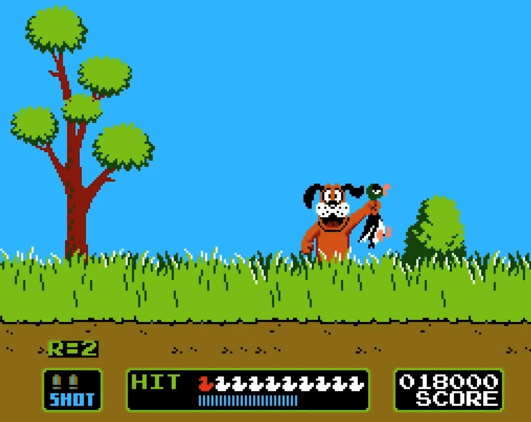

### Распределение игр по жанрам (актуальное)

Мы рассмотрели распределение продаж по жанрам для всего датасета, теперь сделаем то же, но для данных с 2014 по 2016

,total_sales
genre,
Action,199360
Shooter,170940
Sports,109480
Role-Playing,101440
Misc,37549
Fighting,28220
Racing,27520
Platform,18090
Adventure,17550


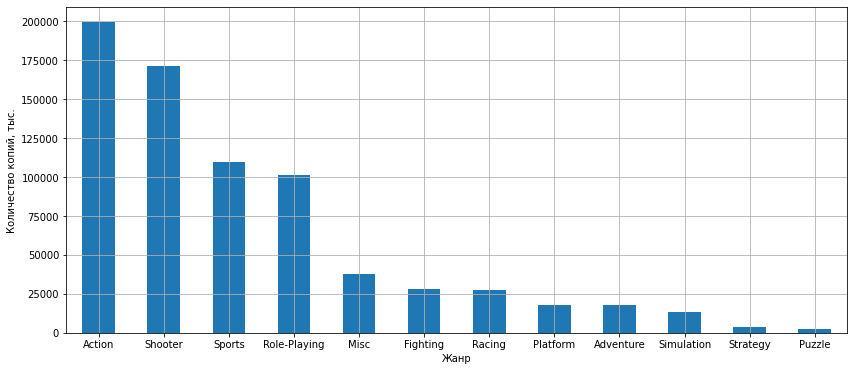

In [66]:
act_genre_rating = (
                    act_data.pivot_table(
                                         index = 'genre', 
                                         values = 'total_sales', 
                                         aggfunc = 'sum'
                                        )
    
                            .sort_values(by = 'total_sales', 
                                         ascending = False)
                   )

display (act_genre_rating)

act_genre_rating.plot(
                      kind= 'bar', 
                      figsize=(14,6), 
                      legend = False,
                      grid = True,
                      rot = 0,
                      fontsize = 10
                     );

plt.xlabel('Жанр');
plt.ylabel("Количество копий, тыс.");

По сравнению с информацией по продажам с 1980 года потчи нет изменений для актуального периода 2014-2016 годов. Первые четыре места в том же порядке занимаю __Action__, __Shooter__, __Sports__ и __RPG__. Пятое место за период 1980 - 2016 занимали платформеры (__Platform__), являвшиеся в основном играми с 2D - графикой. Современные игры реже используют 2D - графику. В актуальный период на 5 место игры без определённого жанра __Misc__. 

Помимо общих продаж по жанрам стоит учесть и количество вышедших тайтлов. Введём такой параметр как удельная успешность жанра (__total_sales_per_game__), который отразит отношение количества проданных в жанре игр к их количеству за актуальный период.

In [67]:
act_genre_rating = act_data.pivot_table(
                                        index = 'genre', 
                                        values = 'total_sales', 
                                        aggfunc = ['sum','count']
                                        )

act_genre_rating['total_sales_per_game'] = round((act_genre_rating['sum'] / act_genre_rating['count']),1)
act_genre_rating.columns = ['total_sales', 'games', 'total_sales_per_game']

act_genre_rating = act_genre_rating.sort_values(by = 'total_sales_per_game', ascending = False)

display (act_genre_rating)

,total_sales,games,total_sales_per_game
genre,,,
Shooter,170940,128,1335.5
Sports,109480,161,680.0
Platform,18090,38,476.1
Fighting,28220,60,470.3
Role-Playing,101440,221,459.0
Racing,27520,69,398.8
Misc,37549,113,332.3
Action,199360,619,322.1
Simulation,13130,44,298.4


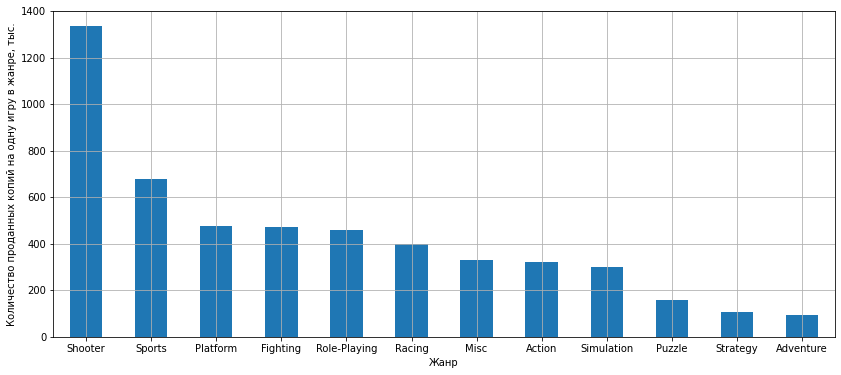

In [92]:
act_genre_rating['total_sales_per_game'].plot(
                                              kind= 'bar', 
                                              figsize=(14,6), 
                                              legend = False,
                                              grid = True,
                                              rot = 0,
                                              fontsize = 10
                                              );

plt.xlabel('Жанр');
plt.ylabel("Количество проданных копий на одну игру в жанре, тыс.");

Видеогр в жанре __Action__ в актульном датасете оказалось самое большое количество - 619, за счёт чего они были на первом месте по продажам на всех платформах за последние три года. 

Однако если взять усредненные продажи по тайтлам, то __Action__ окажется на восьмом месте. На первом же месте окажутся игры в жанре __Shooter__, которых вышло всего 128, но продавались они в среднем от 1,3 миллионов копий за один уникальный тайтл за последние три года. 

На третьем месте неожиданно оказались платформеры (__Platform__). Скромные 38 вышедших игр продавались в среднем не менее чем по 400 тысяч копий, что говорит в целом о качестве игр, выходящих в этом жанре. Или же платформеры популярны из-за ностальгических чувств, возникших у тех, кто начинал играть в возрасте 5-10 лет на Dendi и Sega и к 2014 году оказался в числе целевой и максимально платёжеспособной аудитории.

In [69]:
act_data.query('genre == "Platform"').sort_values(by = 'total_sales', ascending = False).head(3)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
424,Super Mario Maker,WiiU,2015,Platform,1180,890,940,200,3210,88,87,E
908,LittleBigPlanet 3,PS4,2014,Platform,660,930,10,310,1910,79,71,E
952,Kirby: Triple Deluxe,3DS,2014,Platform,610,340,790,90,1830,80,88,E


In [70]:
act_data.query('genre == "Shooter"').sort_values(by = 'total_sales', ascending = False).head(3)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6030,5860,360,2380,14630,0,0,no rating
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2990,3490,220,1280,7980,0,0,no rating
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2810,3480,140,1230,7660,83,57,M


In [71]:
act_data.query('genre == "Action"').sort_values(by = 'total_sales', ascending = False).head(3)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
42,Grand Theft Auto V,PS4,2014,Action,3960,6310,380,1970,12620,97,83,M
165,Grand Theft Auto V,XOne,2014,Action,2810,2190,0,470,5470,97,79,M
225,The Last of Us,PS4,2014,Action,1880,2000,70,770,4720,0,0,no rating


In [72]:
act_data.query('genre == "Strategy"').sort_values(by = 'total_sales', ascending = False).head(3)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
3791,StarCraft II: Legacy of the Void,PC,2015,Strategy,190,290,0,40,520,88,83,T
5165,Sid Meier's Civilization: Beyond Earth,PC,2014,Strategy,110,220,0,30,360,81,55,E10+
5589,Dragon Ball Heroes: Ultimate Mission 2,3DS,2014,Strategy,0,0,320,0,320,0,0,no rating


Подробно рассмотрев самые популярные и непопулярные жанры за актуальный период, можно сказать:

* GTA 5 - безоговорочный лидер продаж в жанре __Action__ и в актуальный период, стоит обратить внимание на возможные релизы игр студии __RockStar Studios__ (например __Red Dead Redemption 2__ анонс - 18 октября 2016);

* __StarCraft2__ - самая популярная игра за актульный период в жанре __Strategy__ является , как было сказано ранее, в основном из-за популярности в киберспорте. Необходимо обращать внимание на популярные мультиплеерные игры;

* За высокие рейтинги жанра платформер ответственны компании __Nintendo__ и __Sony__ с франшизами __Super Mario__, __LittleBigPlanet__ и __Kirbi__. Стоит обращать внимание на небольшие игры в жанре платформер, выходяших по известным всем поколениям геймеров франшизам;

* Франшиза __Call of Duty__ лидирует в жанре __Shooter__. Учитывая, что игры по франшизе выходит каждый год-два, стоит обратить внимание именно на эту серию игр (__Call of Duty: WWII__ анонс - 21 апреля 2017)

## Портрет пользователя по регионам

Для того, чтобы составить прогноз продаж на 2017 год, рассмотрим данные за актуальный период для каждого из трёх самых больших регионов дистрибуции видеоигр в отдельности.

### NA - Северная Америка

In [73]:
na_act_data = (
               act_data.drop(['eu_sales','jp_sales','other_sales'], axis=1)
                       .query('na_sales > 0')
                       .sort_values(by = 'na_sales', ascending = False)
              )

display(na_act_data.head())

,name,platform,release_year,genre,na_sales,total_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6030,14630,0,0,no rating
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4590,7390,0,0,no rating
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4350,11680,0,0,no rating
42,Grand Theft Auto V,PS4,2014,Action,3960,12620,97,83,M
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3270,7550,0,0,no rating


#### Самые популярные платформы (Топ 5)

,na_sales
platform,
PS4,98610
XOne,81270
X360,28300
3DS,22640
PS3,22049


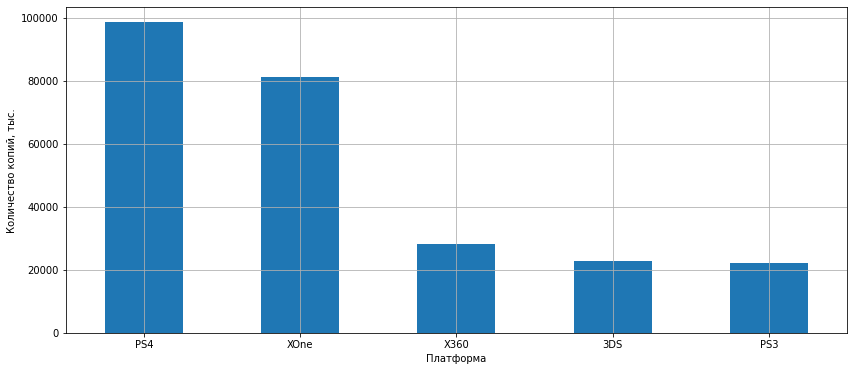

In [74]:
display(
        na_act_data.pivot_table(
                                index = 'platform', 
                                values = 'na_sales', 
                                aggfunc = 'sum'
                                )
        
                    .sort_values(by = 'na_sales', 
                                 ascending = False)
        
                    .head()
       )


(
na_act_data.pivot_table(
                        index = 'platform', 
                        values = 'na_sales', 
                        aggfunc = 'sum'
                        )

            .sort_values(by = 'na_sales', 
                         ascending = False)
    
            .head()
        
            .plot(
                  kind= 'bar', 
                  figsize=(14,6), 
                  legend = False,
                  grid = True,
                  rot = 0,
                  fontsize = 10
                 )
)

plt.xlabel('Платформа');
plt.ylabel("Количество копий, тыс.");

Несмотря на то, что регион Северной Америки - родина приставки __Microsoft Xbox One__, __Playstation 4__ обходит её по общим продажам видеоигр в два раза, находясь на первом месте с почти 100 миллионами проданных копий. __Nintendo 3DS__ занимает лишь 4 место с 22 миллионами.

#### Самые популярные жанры (Топ 5)

,na_sales
genre,
Shooter,79020
Action,72530
Sports,46130
Role-Playing,33470
Misc,15049


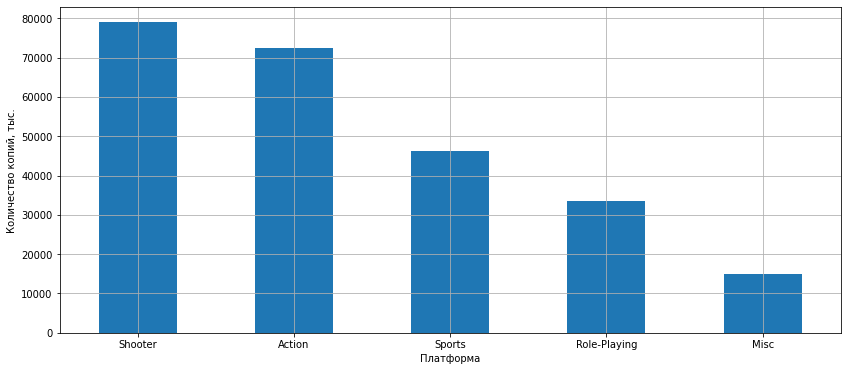

In [75]:
display(
        na_act_data.pivot_table(
                                index = 'genre', 
                                values = 'na_sales', 
                                aggfunc = 'sum'
                                )
                    .sort_values(by = 'na_sales', 
                                 ascending = False).head()
       )


(
na_act_data.pivot_table(
                        index = 'genre', 
                        values = 'na_sales', 
                        aggfunc = 'sum'
                        )

            .sort_values(by = 'na_sales', 
                         ascending = False)
    
            .head()
        
            .plot(
                  kind= 'bar', 
                  figsize=(14,6), 
                  legend = False,
                  grid = True,
                  rot = 0,
                  fontsize = 10
                  )
)

plt.xlabel('Платформа');
plt.ylabel("Количество копий, тыс.");

В Северной Америке отдают предпочтения жанрам __Action__, __Shooter__ и __Sports__. Типичный американский образ жизни виден и в продажах видеоигр)

#### Влияние ESRB на продажи 

,na_sales
rating,
M,96420
no rating,64719
E,50740
T,38950
E10+,33230


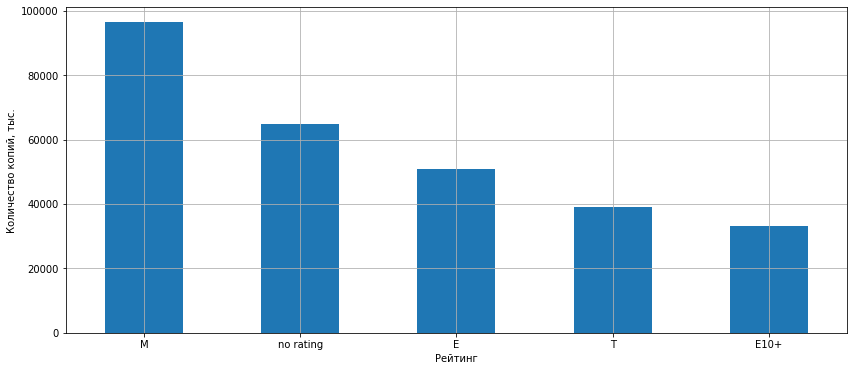

In [76]:
display(
        na_act_data.pivot_table(
                                index = 'rating', 
                                values = 'na_sales', 
                                aggfunc = 'sum'
                                )
                    .sort_values(by = 'na_sales', 
                                 ascending = False)
       )

(
na_act_data.pivot_table(
                        index = 'rating', 
                        values = 'na_sales', 
                        aggfunc = 'sum'
                        )
    
            .sort_values(by = 'na_sales', 
                         ascending = False)
    
            .plot(
                  kind= 'bar', 
                  figsize=(14,6), 
                  legend = False,
                  grid = True,
                  rot = 0,
                  fontsize = 10
                 )
)

plt.xlabel('Рейтинг');
plt.ylabel("Количество копий, тыс.");

Наибольшей популярностью в регионе северной америки пользуются видеоигры с рейтингом «M» («Mature») — «Для взрослых» с 96 миллионами проданных копий. На втором месте в рейтинге продаж при этом стоят видеоигры, которые не озаботились получением рейтинга __ESRB__, с продажами более 64 миллионами копий.

#### Промежуточный вывод 
Типичный пользователь / покупатель в регионе Северная Америка:
* достиг возраста 17 лет (__ESRB «M»__),
* играет на __Playstation 4__ или __Xbox One__,
* предпочитая жанры __Action__ или __Shooter__,
* неравнодушен к серии игр __Call of Duty__.

### EU - Европа

In [77]:
eu_act_data = (act_data.drop(['na_sales','jp_sales','other_sales'], axis=1)
                       .query('eu_sales > 0')
                       .sort_values(by = 'eu_sales', ascending = False))

display(eu_act_data.head())

,name,platform,release_year,genre,eu_sales,total_sales,critic_score,user_score,rating
42,Grand Theft Auto V,PS4,2014,Action,6310,12620,97,83,M
77,FIFA 16,PS4,2015,Sports,6120,8580,82,43,E
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,5860,14630,0,0,no rating
94,FIFA 17,PS4,2016,Sports,5750,7600,85,50,E
143,FIFA 15,PS4,2014,Sports,4330,6080,82,57,E


#### Самые популярные платформы (Топ 5)

,eu_sales
platform,
PS4,130040
XOne,46250
PS3,25540
PC,17970
3DS,16120


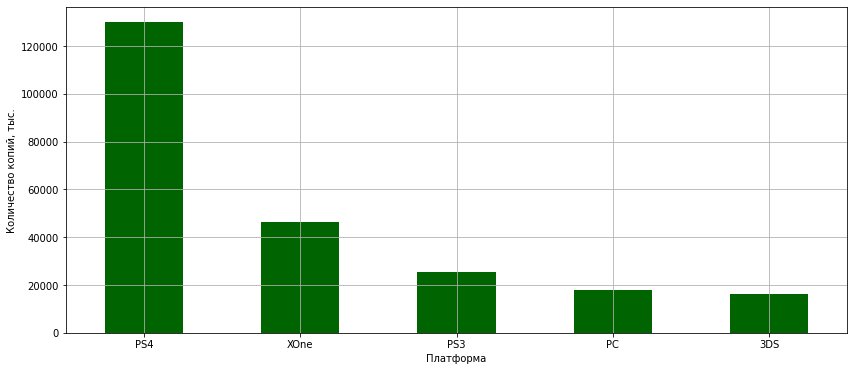

In [78]:
display(
        eu_act_data.pivot_table(
                                index = 'platform', 
                                values = 'eu_sales', 
                                aggfunc = 'sum'
                                )
                    .sort_values(by = 'eu_sales', 
                                 ascending = False).head()
       )

(
eu_act_data.pivot_table(
                        index = 'platform', 
                        values = 'eu_sales', 
                        aggfunc = 'sum'
                        )

            .sort_values(by = 'eu_sales', 
                         ascending = False)
            
            .head()
            
            .plot(
                  kind= 'bar', 
                  figsize=(14,6), 
                  legend = False,
                  grid = True,
                  rot = 0,
                  fontsize = 10,
                  color = 'darkgreen'
                 )
)

plt.xlabel('Платформа');
plt.ylabel("Количество копий, тыс.");

В Европе, как и в Северной Америки - __Playstation 4__ обходит ближайшего конкурента по общим продажам, но здесь - почти в три раза. __Nintendo 3DS__ занимает только 5-ое место в регионе.

#### Самые популярные жанры (Топ 5)

,eu_sales
genre,
Action,74680
Shooter,65520
Sports,45730
Role-Playing,28170
Racing,14130


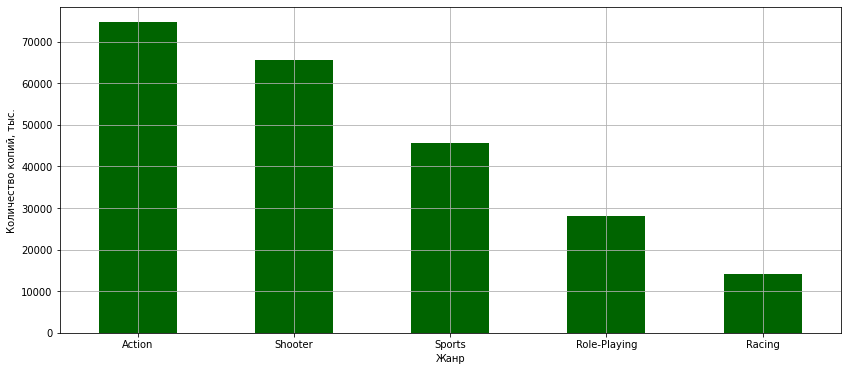

In [79]:
display(
        eu_act_data.pivot_table(
                                index = 'genre', 
                                values = 'eu_sales', 
                                aggfunc = 'sum'
                                )
        
                    .sort_values(by = 'eu_sales', 
                                 ascending = False)
        
                    .head()
       )

(
eu_act_data.pivot_table(
                        index = 'genre', 
                        values = 'eu_sales', 
                        aggfunc = 'sum'
                        )

            .sort_values(by = 'eu_sales', 
                         ascending = False)
    
            .head()
        
            .plot(
                  kind= 'bar', 
                  figsize=(14,6), 
                  legend = False,
                  grid = True,
                  rot = 0,
                  fontsize = 10,
                  color = 'darkgreen'
                  )
)

plt.xlabel('Жанр');
plt.ylabel("Количество копий, тыс.");

Типичный геймер в регионе Европа предпочитает те же жанры, что и житель Северной Америки: __Action__, __Shooter__ и __Sports__.

#### Влияние ESRB на продажи 

,eu_sales
rating,
M,93440
no rating,58950
E,58060
T,34070
E10+,26160


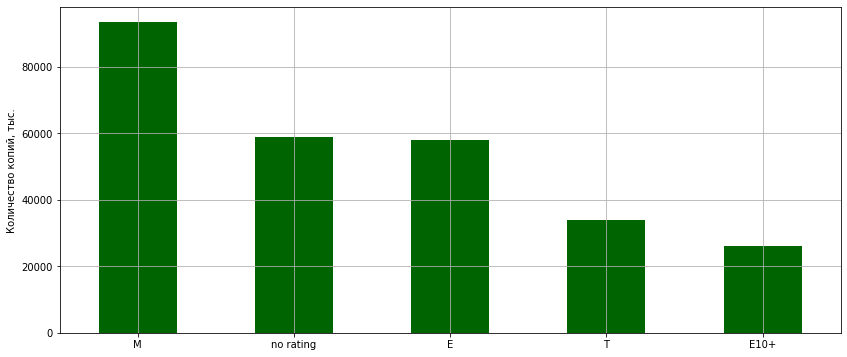

In [80]:
display(eu_act_data.pivot_table(
    index = 'rating', 
    values = 'eu_sales', 
    aggfunc = 'sum'
).sort_values(by = 'eu_sales', 
              ascending = False))


eu_act_data.pivot_table(
    index = 'rating', 
    values = 'eu_sales', 
    aggfunc = 'sum'
).sort_values(by = 'eu_sales', 
              ascending = False).plot(
    kind= 'bar', 
    figsize=(14,6), 
    legend = False,
    grid = True,
    rot = 0,
    fontsize = 10,
    color = 'darkgreen'
);

plt.xlabel('');
plt.ylabel("Количество копий, тыс.");

Наибольшей популярностью в регионе Европа также пользуются видеоигры с __ESRB__ рейтингом «M» («
с более чем 93 миллионами проданных копий. На втором месте также видеоигры без рейтинга __ESRB__ (или ещё не успевшие таковой получить).

#### Промежуточный вывод 
Типичный пользователь / покупатель в регионе Европа:
* достиг возраста 17 лет (__ESRB «M»__),
* играет на __Playstation 4__ или __Xbox One__, но не __Nintendo 3DS;
* предпочитая жанры __Action__, __Shooter__ или __Sports__,
* неравнодушен к серии футбольных игр __FIFA__.

### JP - Япония

In [81]:
jp_act_data = (act_data.drop(['na_sales','eu_sales','other_sales'], axis=1)
                       .query('jp_sales > 0')
                       .sort_values(by = 'jp_sales', ascending = False))

display(jp_act_data.head())

,name,platform,release_year,genre,jp_sales,total_sales,critic_score,user_score,rating
412,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,3180,3280,0,0,no rating
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,3100,11680,0,0,no rating
406,Monster Hunter X,3DS,2015,Action,2790,3320,0,0,no rating
563,Yokai Watch 2 Shinuchi,3DS,2014,Role-Playing,2680,2680,0,0,no rating
312,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,2620,3890,86,87,T


#### Самые популярные платформы (Топ 5)

,jp_sales
platform,
3DS,44240
PS4,15020
PSV,14540
PS3,11220
WiiU,7310


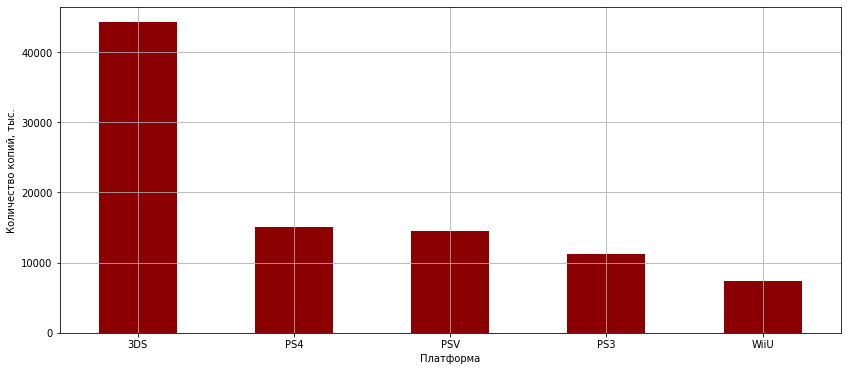

In [82]:
display(
        jp_act_data.pivot_table(
                                index = 'platform', 
                                values = 'jp_sales', 
                                aggfunc = 'sum'
                                )
    
                    .sort_values(by = 'jp_sales', 
                                 ascending = False)
    
                    .head()
        )

(
jp_act_data.pivot_table(
                        index = 'platform', 
                        values = 'jp_sales', 
                        aggfunc = 'sum'
                        )
    
            .sort_values(by = 'jp_sales', 
              ascending = False).head()
    
            .plot(
                  kind= 'bar', 
                  figsize=(14,6), 
                  legend = False,
                  grid = True,
                  rot = 0,
                  fontsize = 10,
                  color = 'darkred'
                  )
)

plt.xlabel('Платформа');
plt.ylabel("Количество копий, тыс.");

В Японии большая часть рынка видеоигр приходится на __Nintendo 3DS__ с более 44 миллионами проданных видеоигр. Второе место в регионе занимает __Playstation 4__ - 15 миллионов. А вот __Xbox One__ не смог попасть в Топ 5, уступив __Playstation 3__, __Nintendo WiiU__ и портатиыной __Playstation Vita__. Японцы явно предпочитают портативные платформы.

#### Самые популярные жанры (Топ 5)

,jp_sales
genre,
Role-Playing,31160
Action,29580
Fighting,6370
Misc,5610
Shooter,4870


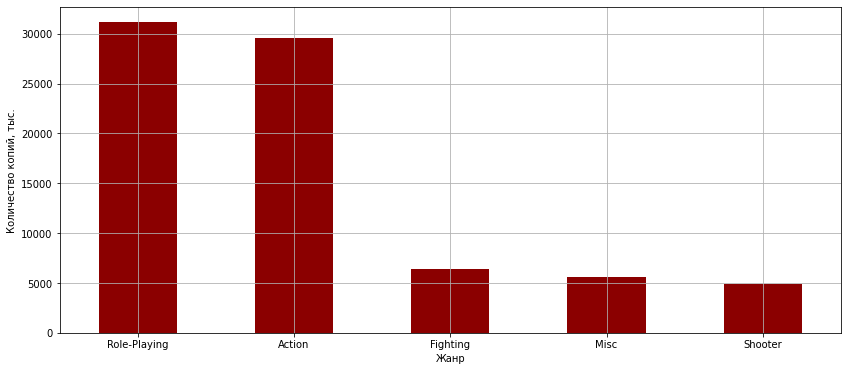

In [83]:
display(
        jp_act_data.pivot_table(
                                index = 'genre', 
                                values = 'jp_sales', 
                                aggfunc = 'sum'
                                )
    
                    .sort_values(by = 'jp_sales', 
                                 ascending = False)
    
                    .head()
        )

(
jp_act_data.pivot_table(
                        index = 'genre', 
                        values = 'jp_sales', 
                        aggfunc = 'sum'
                        )
    
            .sort_values(by = 'jp_sales', 
                         ascending = False)
    
            .head()
    
            .plot(
                  kind= 'bar', 
                  figsize=(14,6), 
                  legend = False,
                  grid = True,
                  rot = 0,
                  fontsize = 10,
                  color = 'darkred'
                  )
)
plt.xlabel('Жанр');
plt.ylabel("Количество копий, тыс.");

В отличии от Северной Америки и Европы, среди самый популярный жанр в регионе Япония - __RPG__ - более 30 миллионов проданных копий. Чуть уступают ему игры в жанре __Action__, а замыкают тройку - __Fighting__.

#### Влияние ESRB на продажи 

,jp_sales
rating,
no rating,56900
T,14780
E,8940
M,8010
E10+,4460


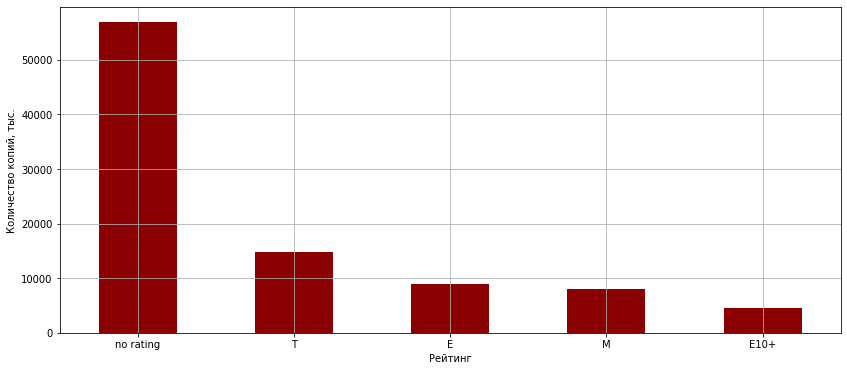

In [84]:
display(
        jp_act_data.pivot_table(
                                index = 'rating', 
                                values = 'jp_sales', 
                                aggfunc = 'sum'
                                )
                    .sort_values(by = 'jp_sales', 
                                 ascending = False).head()
        )

(
jp_act_data.pivot_table(
                        index = 'rating', 
                        values = 'jp_sales', 
                        aggfunc = 'sum'
                        )
    
            .sort_values(by = 'jp_sales', 
                        ascending = False)
    
            .head()
            
            .plot(
                  kind= 'bar', 
                  figsize=(14,6), 
                  legend = False,
                  grid = True,
                  rot = 0,
                  fontsize = 10,
                  color = 'darkred'
                  )
)

plt.xlabel('Рейтинг');
plt.ylabel("Количество копий, тыс.");

По всей видимости, продажа видеоигр в Японии не так сильно зависит от наличия рейтинга __ESRB__, как в других регионах. Самые популярные игры в Японии не получили рейтинга __ESRB__, и таких более 56 миллионов копий.

В Японии дейтсвует своя рейтинговая возрастная система __CERO__ (__Computer Entertainment Rating Organization__), поэтому такое распредление вполне логично.

#### Промежуточный вывод

Типичный пользователь / покупатель в регионе Япония:
* играет на __Nintendo 3DS__ ,
* предпочитая жанры __RPG__,
* неравнодушен к франшизам __Yokai Watch__, __Pokemon__ и __Monster Hunter__.	

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверим гипотезу о равенстве средних пользовательских оценок для двух платформ __Xbox One__ и __PC__ с помощью двустороннего t-теста. За критический уровень статистической значимости примем 5%. Сформулипуем нулевую и альтернативную гипотезу:

H0: Оценка видеоигр пользователей (__user_score__) Xbox One = оценка видеоигр пользователей (__user_score__) PC

H1: Оценка видеоигр пользователей (__user_score__) Xbox One ≠ оценка видеоигр пользователей (__user_score__) PC

Перед началом теста проверим какой параметр нужно указать в тесте для дисперсии выборок. Если выборки разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные при вызове метода scipy.stats.ttest_ind() - equal_var = False.

In [85]:
act_data.query('platform == "XOne" and user_score > 0 ')['user_score'].count()

165

In [86]:
act_data.query('platform == "PC" and user_score > 0 ')['user_score'].count()

122

Да, выборки выборки для __Xbox_One__ и __PC__ отличаются по размерам, поэтому предположим, что диссперсия для них неодинакова.

In [87]:
xone_user_score = act_data.query('platform == "XOne" and user_score > 0 ')['user_score']
pc_user_score = act_data.query('platform == "PC" and user_score > 0 ')['user_score']

alpha = 0.05

results = st.ttest_ind(
    xone_user_score, 
    pc_user_score,
    equal_var = False
)

print(results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.11601398086668918
Не получилось отвергнуть нулевую гипотезу


Результаты теста показала, что статистически средние пользовательские оценки __user_score__ двух платформ __Xbox One__ и __PC__ __равны__. 

Таким образом, cредние пользовательские рейтинги платформ __Xbox One__ и __PC__ не имеют статистически значимых отличий.

### Средние пользовательские рейтинги жанров Action и Sports разные

Аналогично с помощью двустороннего t-теста проверим гипотезу о равенстве средних пользовательских оценок для двух жанров __Action__ и __Sports__ . За критический уровень статистической значимости примем 5%. Сформулипуем нулевую и альтернативную гипотезу:

H_0: Оценка видеоигр пользователей (__user_score__) жанра __Action__ = оценка видеоигр пользователей (__user_score__) для жанра __Sports__

H_1: Оценка видеоигр пользователей (__user_score__) жанра __Action__ ≠ оценка видеоигр пользователей (__user_score__) для жанра __Sports__

In [88]:
act_data.query('genre == "Action" and user_score > 0 ')['user_score'].count()

297

In [89]:
act_data.query('genre == "Sports" and user_score > 0 ')['user_score'].count()

127

In [90]:
action_user_score = act_data.query('genre == "Action" and user_score > 0 ')['user_score']
sports_user_score = act_data.query('genre == "Sports" and user_score > 0 ')['user_score']

alpha = 0.05

results = st.ttest_ind(
                        action_user_score, 
                        sports_user_score,
                        equal_var = False
                      )

print(results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.182555038264477e-14
Отвергаем нулевую гипотезу


Результаты теста показала, что cредние пользовательские оценки __user_score__ для двух жанров __Action__ и __Sports__ не равны и эта разница статистически значима.

## Общий вывод


В рамках проекта изучен набор данных по продажам видеоигр за 1980 - 2016 года, состоящий из 16713 строк. 

По окончании предобработки данных в датасете оставалось 16446 строк. Таким образом, уровень потери данных составил приемлимые 1,6 %.

В рамках исследовательского анализ были сделаны следующие выводы: 

* __Жизненный цикл__ платформы - приблизительно __10 лет__ с пиком продаж приблизительно в середине периода поддержки платформы;
* На основе изученого было принято решение взять за "__актуальные данные__" период последних 3 лет: __2014 - 2016 года__;
* Самыми перспективными платформами для дистрибуции видеоигр, на основе данных за актуальный период, являются __Microsoft Xbox One__, __Sony Playstation 4__ и __Nintendo 3DS__;
* За актуальный период на общие продажи видеоигр __сильное влияние__ оказывали __оценки критиков__;
* В рамках проекта сформированы типичные портреты пользователей / геймеров для трёх основных регионов дистрибуции:

  __Северная Америка__  
    * достиг возраста 17 лет (__ESRB «M»__),
    * играет на __Playstation 4__ или __Xbox One__,
    * предпочитая жанры __Action__ или __Shooter__,
    * неравнодушен к серии игр __Call of Duty__.
    
  __Европа__  
    * достиг возраста 17 лет (__ESRB «M»__),
    * играет на __Playstation 4__ или __Xbox One__, и не играет на __Nintendo 3DS__
    * предпочитая жанры __Action__, __Shooter__ или __Sports__,
    * неравнодушен к серии футбольных игр __FIFA__.
        
  __Япония__  
    * играет на __Nintendo 3DS__ и других портативных консолях,
    * предпочитая жанр __RPG__ всем остальным,
    * неравнодушен к серииям игр  __Yokai Watch__, __Pokemon__ и __Monster Hunter__.
    
Исходя из всей изученной информации и всех ранее сделанных промежуточных выводов, можно сформировать __основные положения стратегии на 2017-ый год для интернет-магазина «Стримчик»__ для планирования рекламных кампании.

Для того чтобы сделать ставку на потенциально популярный продукт, при выборе объекта для рекламы необходимо:

* учитывать __оценки критиков__, которые появляются до официального релиза видеоигры, __высокие оценки критиков - высокие продажи__;
* обращать внимание только на видеоигры, которые выходят на платформах __Microsoft Xbox One__, __Sony Playstation 4__ и __Nintendo 3DS__;
* не вкладывать усилия в продвижение игр на платформе __Xbox One__ в регионе __Япония__;
* не вкладывать усилия в продвижение игр на платформе __Nintendo 3DS__ в регионе __Европа__;
* особое внимание уделять популярным во всех регионах жанрам __Action__, __Shooter__ и __Shooter__;
* уделить внимание популярным в регионах __Северной Америке__ и __Европа__ видеоиграм жанра __Sports__, а в __Японии__ жанру __RPG__;
* уделить внимание видеоиграм с рейтингом __ESRB "M"__, ориентируясь на более взрослую и платежеспособную аудиторию в регионах __Северная Америка__ и __Европа__;
* особое внимание уделять новым проектам по крупным франшизам:
    * GTA (__Action__)
    * Call of Duty (__Shooter__)
    * FIFA (__Sports__)
* не забывать о видеоиграх в жанре __Platform__ для платформ __Nintendo__, особенно в регионе __Япония__.